# Content

#### 1. Data/Domain Understanding and Exploration
    1.1. Meaning and Type of Features; Analysis of Univariate Distributions
    1.2. Analysis of Predictive Power of Features
    1.3. Data Processing for Data Exploration and Visualisation


#### 2. Data Processing for Machine Learning
    2.1. Dealing with Missing Values, Outliers, and Noise
    2.2. Feature Engineering, Data Transformations, Feature Selection

#### 3. Model Building 
    3.1. Algorithm Selection, Model Instantiation and Configuration
    3.2. Grid Search, and Model Ranking and Selection

#### 4. Model Evaluation and Analysis
    4.1. Coarse-Grained Evaluation/Analysis
    4.2. Feature Importance
    4.3. Fine-Grained Evaluation



# 1. Data/Domain Understanding and Exploration

## 1.1. Meaning and Type of Features; Analysis of Distributions

#### Data/Business understanding

Autotrader is a digital marketplace where individuals and businesses can buy and sell vehicles. The company collects data on the cars that are listed for sale on its platform, as well as information about the buyers and sellers who use the service. The dataset contains a collection of advertisements with vehicle information such as brand, type, color, mileage, selling price, etc. The aim of this report is to produce a regression model for predicting the selling price given the historical data of the cars.

*  **Public reference (public_reference):** A unique identifier assigned to every car. It is numerical data.

* **Mileage:** It is a measure of the distance that a vehicle has traveled (recorded in miles). A vehicle's mileage can also be used to calculate how much use and wear and tear it has had. It is numerical data.

*  **Car registration code (reg_code):** It provides the area and year the car was registered, and it is used to identify when a car is being driven on the road or when it is being sold or transferred to a new owner. It has both numerical and categorical data.

* **Colour (standard_colour):** Describes the colour of the car. It is categorical data.

* **Make (standard_make):**  Describes the manufacturer of the car. It is categorical data.

* **Model (standard_model):** Describes the car's manufacturer's model. It is categorical data.

* **Vehicle condition (vehicle_condition):** This categorizes the condition of the car as either used or new. It is categorical data.

*  **Year of registration (year_of_registration):** The previous owner's registration year before the car was put up for sale. It is numerical data.

* **Price:** The price at which the car was sold. It is a numerical data

* **Body type (body_type):** Describes the body type model of the car make and model. It is categorical data.

* **Crossover (crossover_car_and_van):** is a type of vehicle that combines features of a car and a van or SUV (sport utility vehicle). It is categorical data.

* **Fuel type (fuel_type):** Fuel type describes the kind of fuel that runs the car's engine. It is categorical data.

# Importing and Setting Up Packages and Environment

In [ ]:
!pip install missingno
!pip install category_encoders
!pip install xgboost
!pip install missingno
!pip install category_encoders
!pip install --user eli5

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,7)})
sns.set(style='ticks', context='notebook', font_scale=1)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Importing Data

In [4]:
auto = pd.read_csv('adverts.csv')

In [5]:
# First I will have a glimpse at the data, making a quick inspection of its structure and content.

auto.head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol


In [6]:
auto.tail(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [7]:
auto.shape

(402005, 12)

## Exploratory Data Analysis

In [8]:
# Summary statistics of the numerical columns in the dataset
auto.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


* Genarally, 75th percentile of car prices is around 20,000
* The mean of the car price irrespective of new or used is approximately 17,300
* The most expensive car cost 9,999,999
* The cheapest car cost 120


In [9]:
# I will inspect the columns to see if there are missing values 
# I will also inspecting the data type of each column, to check for improper representation which will give me an insight about the Dtype in each column.

auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* There are 402005 rows and 12 columns in the data set. The total number of features is 12. 
* From the info, it can be observed that the reg_code column has an "object" datatype instead of an int64. This is a result of the mixed data type in the column.
* The year of registration shouldn't be a float64 Dtype, knowing that it is in years. This will be converted to an "int" datatype for proper representation.
* For convenience, all object datatype columns will be converted to lower case.
* There are also a couple of missing values that will be addressed in processing.
* Before commenting on the missing values, let's take a quick look at the distributions of the numerical and categorical columns.

## 1.1 Analysis of Univariate Distributions

### Mileage

In [10]:
# Summary statistics of mileage
auto['mileage'].describe()

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64

* The minimum value for mileage is 0. This is likely for new cars. The maximum value is 999,999. Cars with the lowest prices may fall in this area.
* The count of 401878 indicates that there are 127 missing values (402005 - 401878).
* The average mileage for new and used cars combined is 37743.

<AxesSubplot:xlabel='mileage', ylabel='Count'>

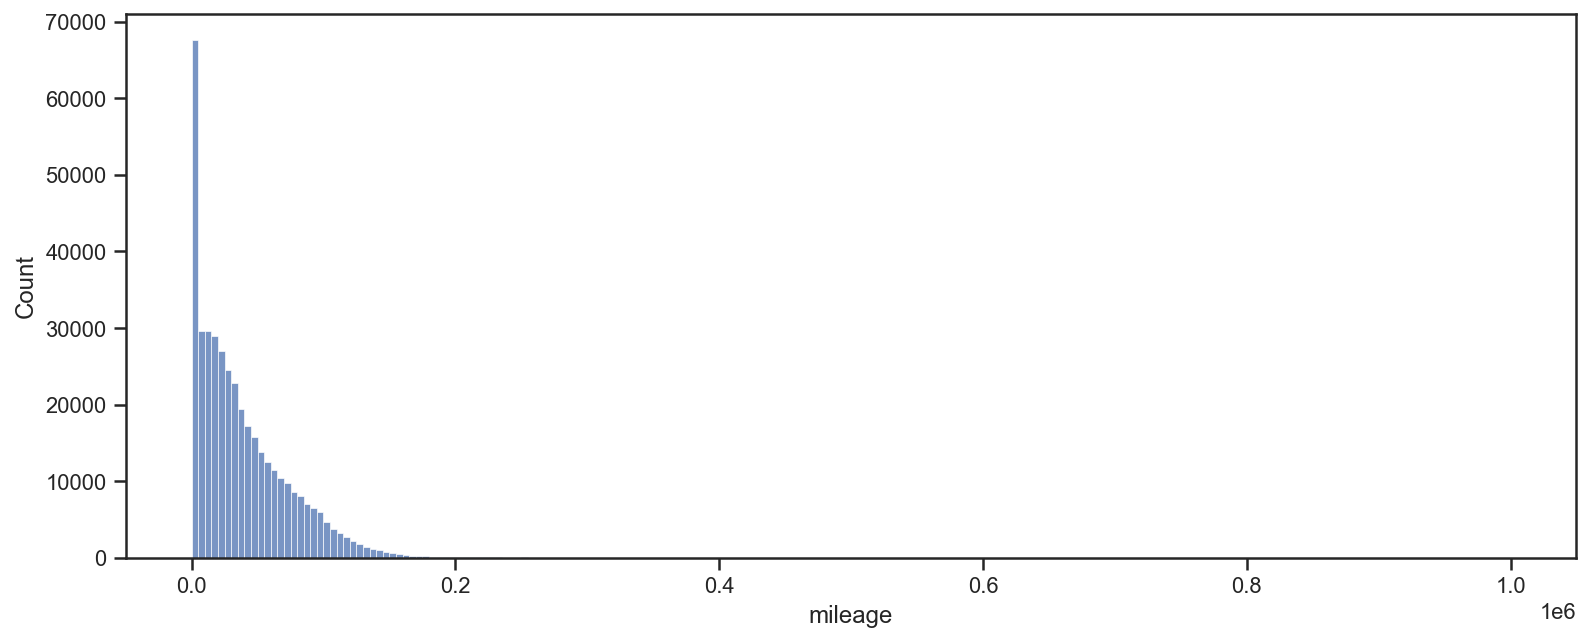

In [11]:
# Visuaizing the distribution of mileage
plt.figure(figsize=(13,5))
sns.histplot(data=auto, x='mileage', bins=200)

* The distribution of mileage is skewed to the left. This could be as a result of outliers.

Text(0.5, 1.0, 'Mileage distribution without ouliers (plot B)')

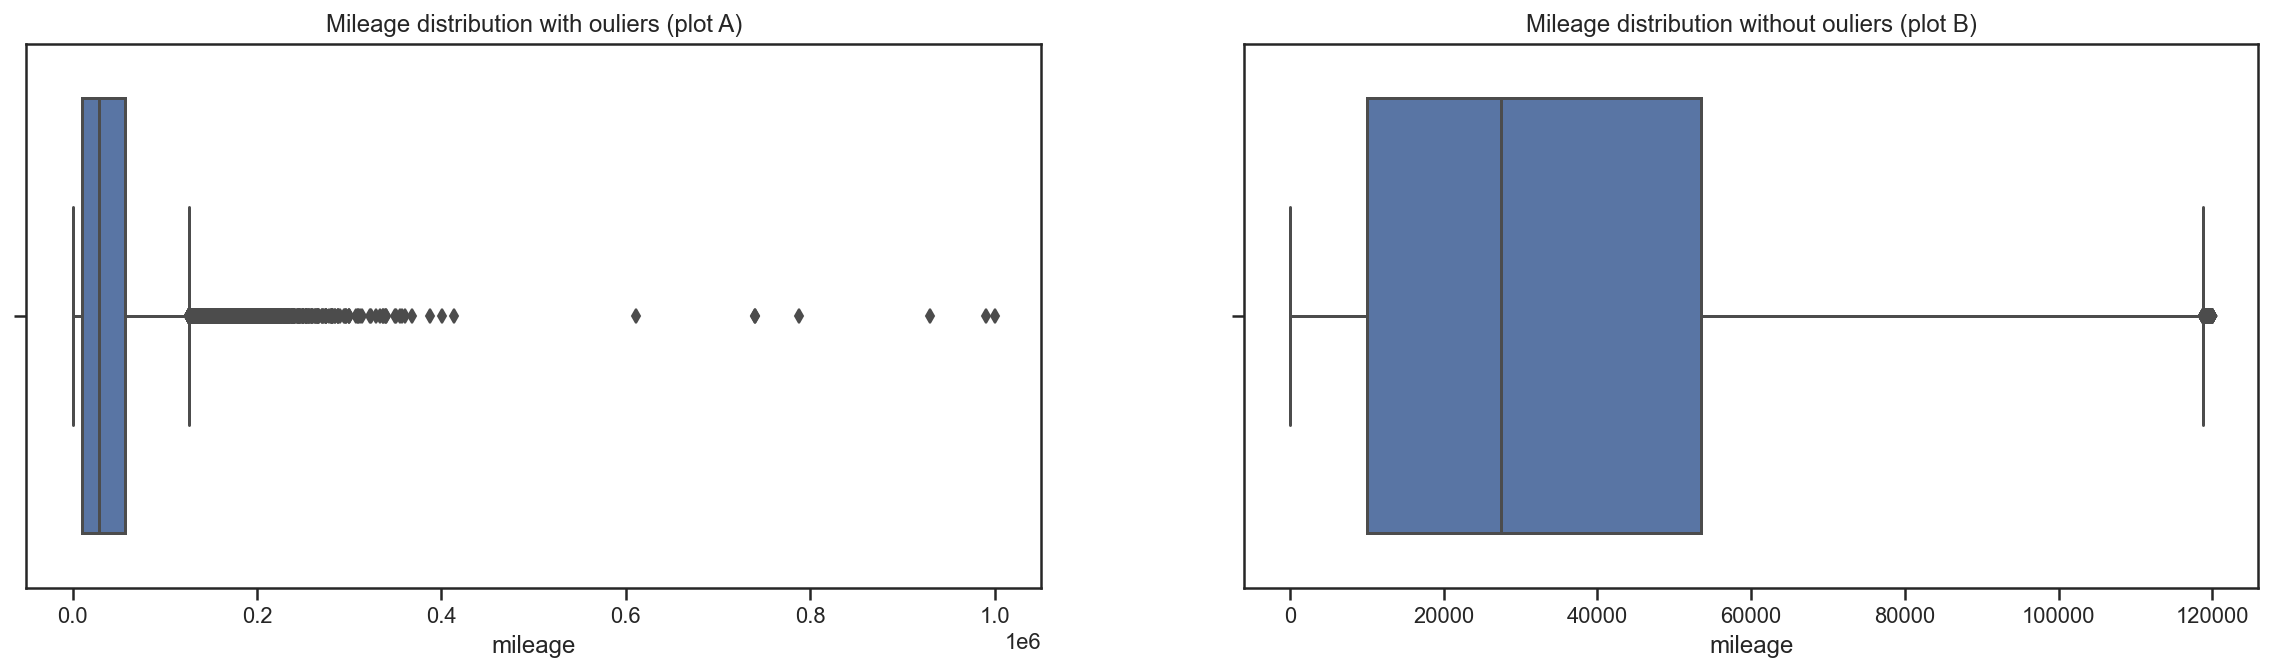

In [12]:
plt.figure(figsize=(20,5))

# Boxplot showing mileage distribution with outliers
plt.subplot(1,2,1)
sns.boxplot(data=auto, x='mileage')
plt.title("Mileage distribution with ouliers (plot A)")

#Removing majority of the outliers of mileage.
auto_in = auto[auto['mileage']<120000]

# Boxplot showing mileage distribution without outliers
plt.subplot(1,2,2)
sns.boxplot(data=auto_in, x='mileage')
plt.title("Mileage distribution without ouliers (plot B)")

* Plot A shows a wide margin between where the majority of the mileage values lie and the outliers. This validates the skewness to the left earlier mentioned.
* To get a better visualization, a plot without the outlier will suffice. 
* A box plot of the distribution after removing the majority of outliers is shown in plot B. This shows a better distribution, however, and confirms that 75% of the data is around 56875.75 as shown above. 

<AxesSubplot:xlabel='mileage', ylabel='Count'>

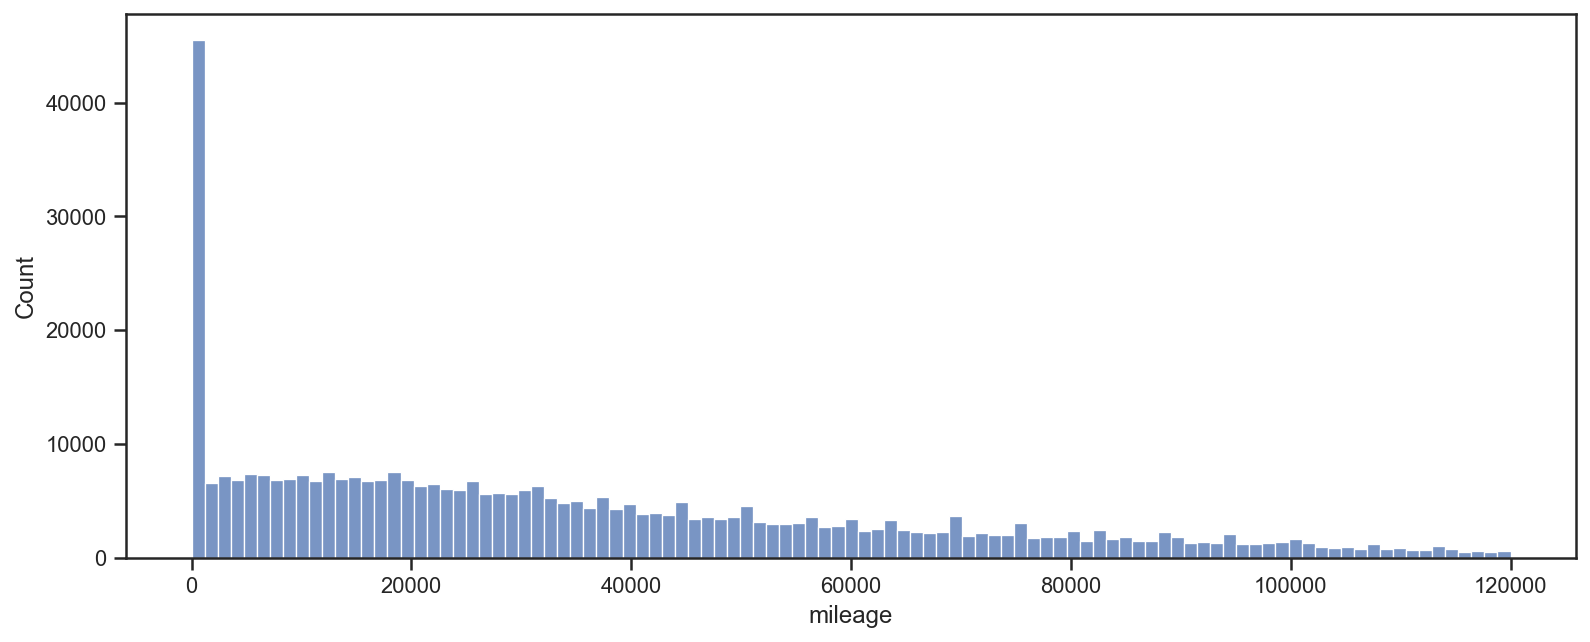

In [13]:
# Visuaizing the distribution of mileage without outliers
plt.figure(figsize=(13,5))
sns.histplot(data=auto_in, x='mileage')

* From the plot without outliers, it can be inferred that a relatively high number of cars in the dataset have mileages of 0.

### Price

In [14]:
# Summary statistics of price
auto['price'].describe()

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64

* The most expensive car cost 9,999,999 and the least expensive car cost 120.
* The count of 402005 shows that there are no missing values.
* The average car price for new and used cars combined is 17,341.97.

<AxesSubplot:xlabel='price', ylabel='Count'>

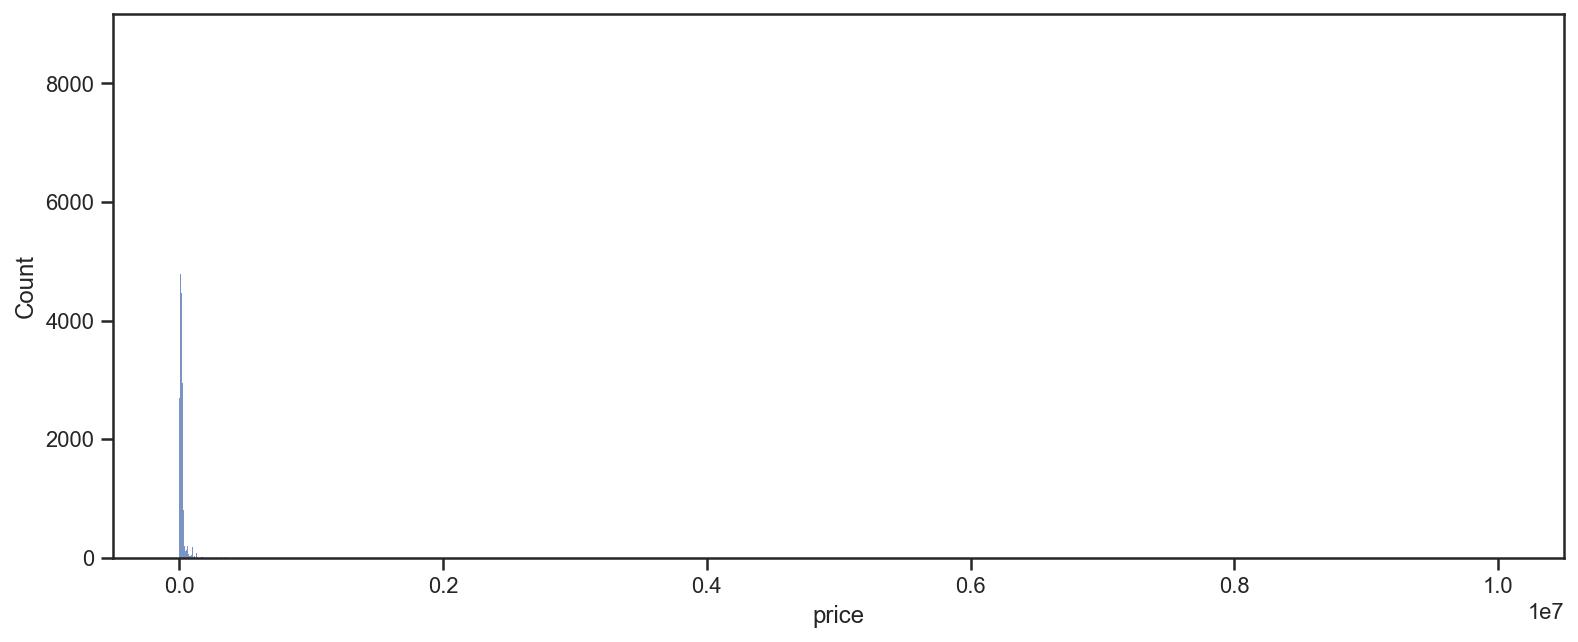

In [15]:
# Visuaizing the distribution of mileage
plt.figure(figsize=(13,5))
sns.histplot(data=auto, x='price')

* The distribution of price is also skewed to the left. This could also be as a result of outliers.

Text(0.5, 1.0, 'Price distribution with log transformation (plot 2)')

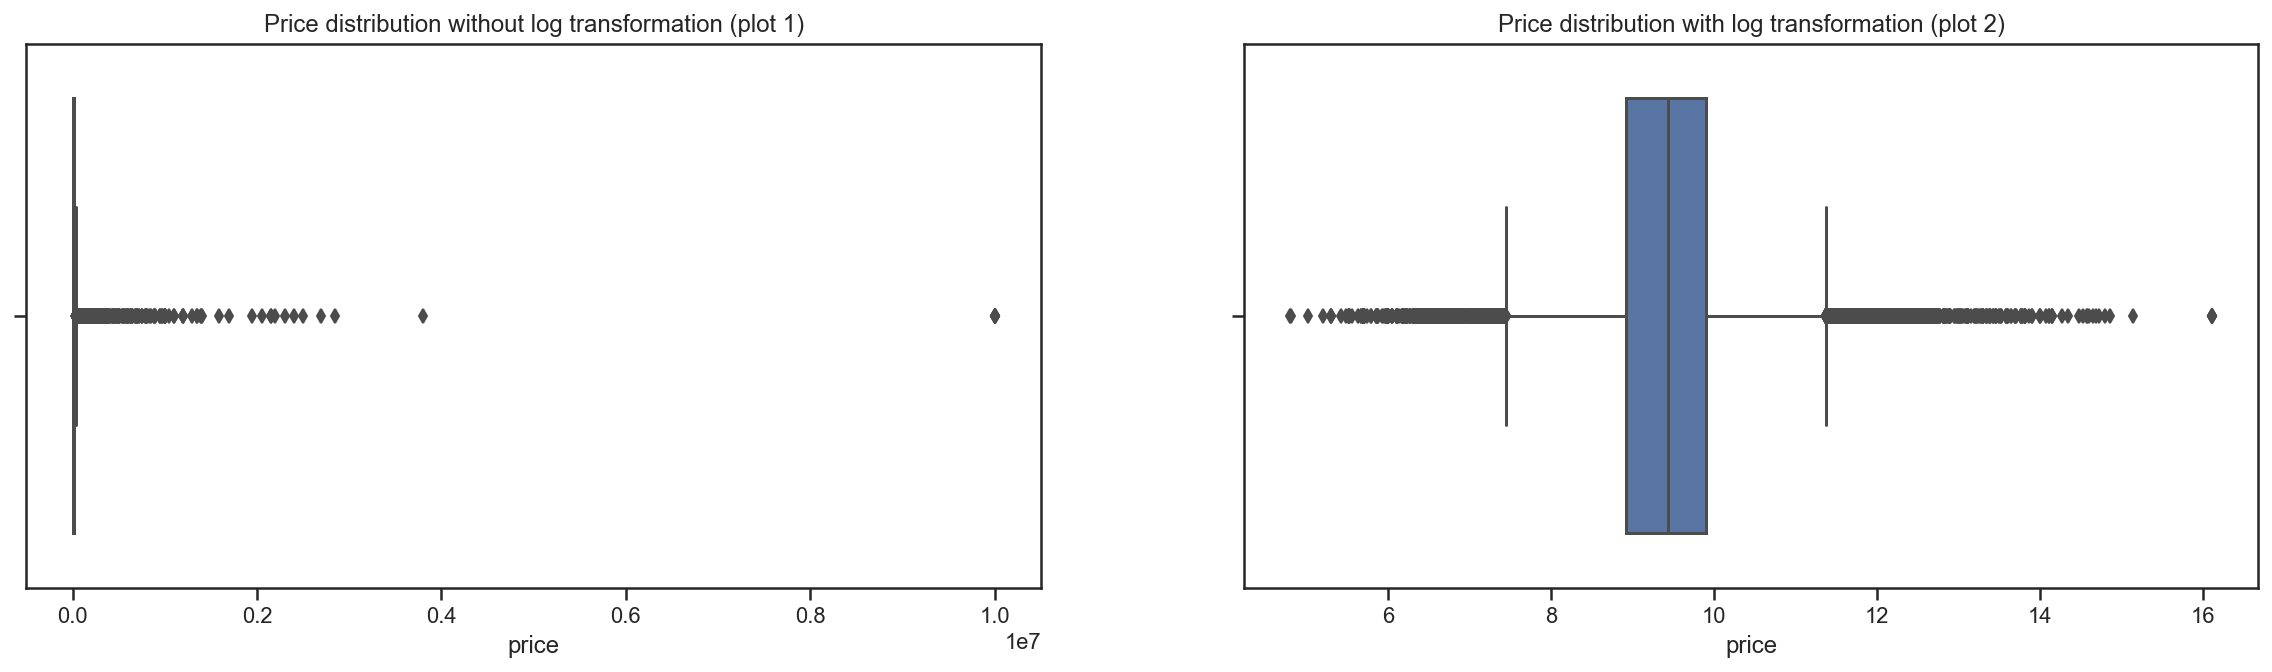

In [16]:
# Normalization of price distribution
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data=auto, x='price')
plt.title("Price distribution without log transformation (plot 1)")

# Normalizing the price distribution with log1p.
price_log = np.log1p(auto['price'])

#Plotting distribution with log transformation
plt.subplot(1,2,2)
sns.boxplot(data=auto, x=price_log)
plt.title("Price distribution with log transformation (plot 2)")

* Plot 1 shows a wide margin between where the majority of the price values lie and the outliers. This validates the skewness to the left.
* A boxplot of the distribution after price normalization is shown in plot 2. Plot 2 also validates the mean from .describe() method i.e(e^9.75 = approximately around 17,000)

Text(0.5, 1.0, 'Price distribution with log transformation')

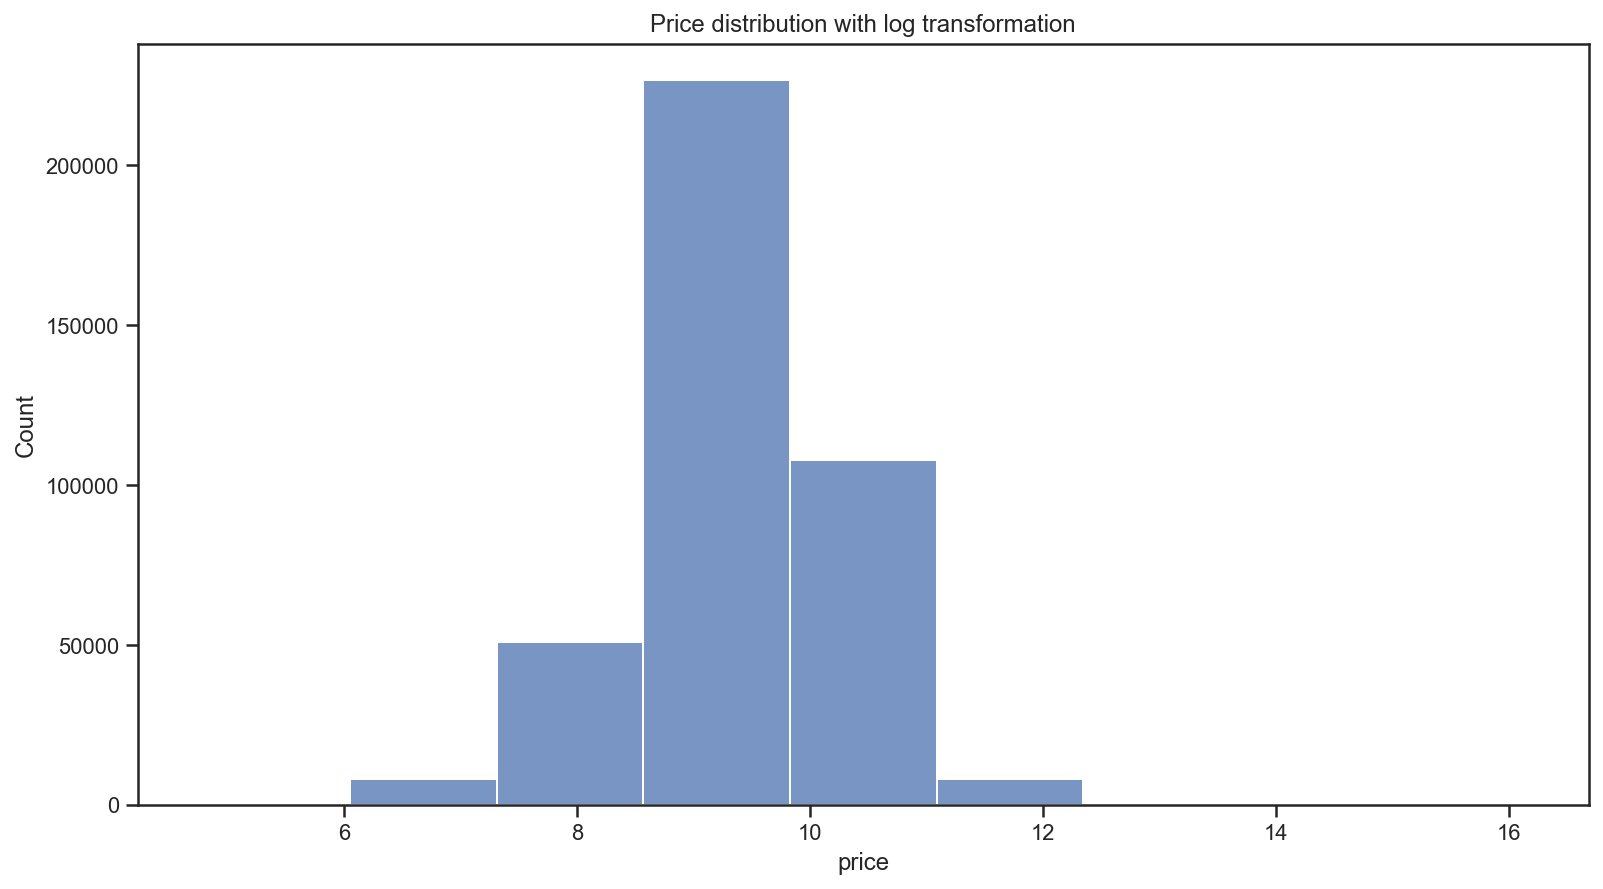

In [17]:
# Visuaizing the distribution of price after normalizing.
plt.figure(figsize=(13,7))

sns.histplot(data=auto, x=price_log, bins=9)
plt.title("Price distribution with log transformation")

* From the distribution plot after normalization,  it can be concluded that the majority of cars in the dataset cost approximately e^10 (i.e approximately 20,000). This validates the 75% quantile value of 2.000000e+04 from the describe() method.

### Fuel type

In [18]:
# Summary statistics of fuel type
auto['fuel_type'].describe()

count     401404
unique         9
top       Petrol
freq      216929
Name: fuel_type, dtype: object

* Most cars in the data set use petrol as fuel.
* The count of 401404 shows that there are a number of missing values.
* There 216929 petrol cars in the dataset.

<AxesSubplot:>

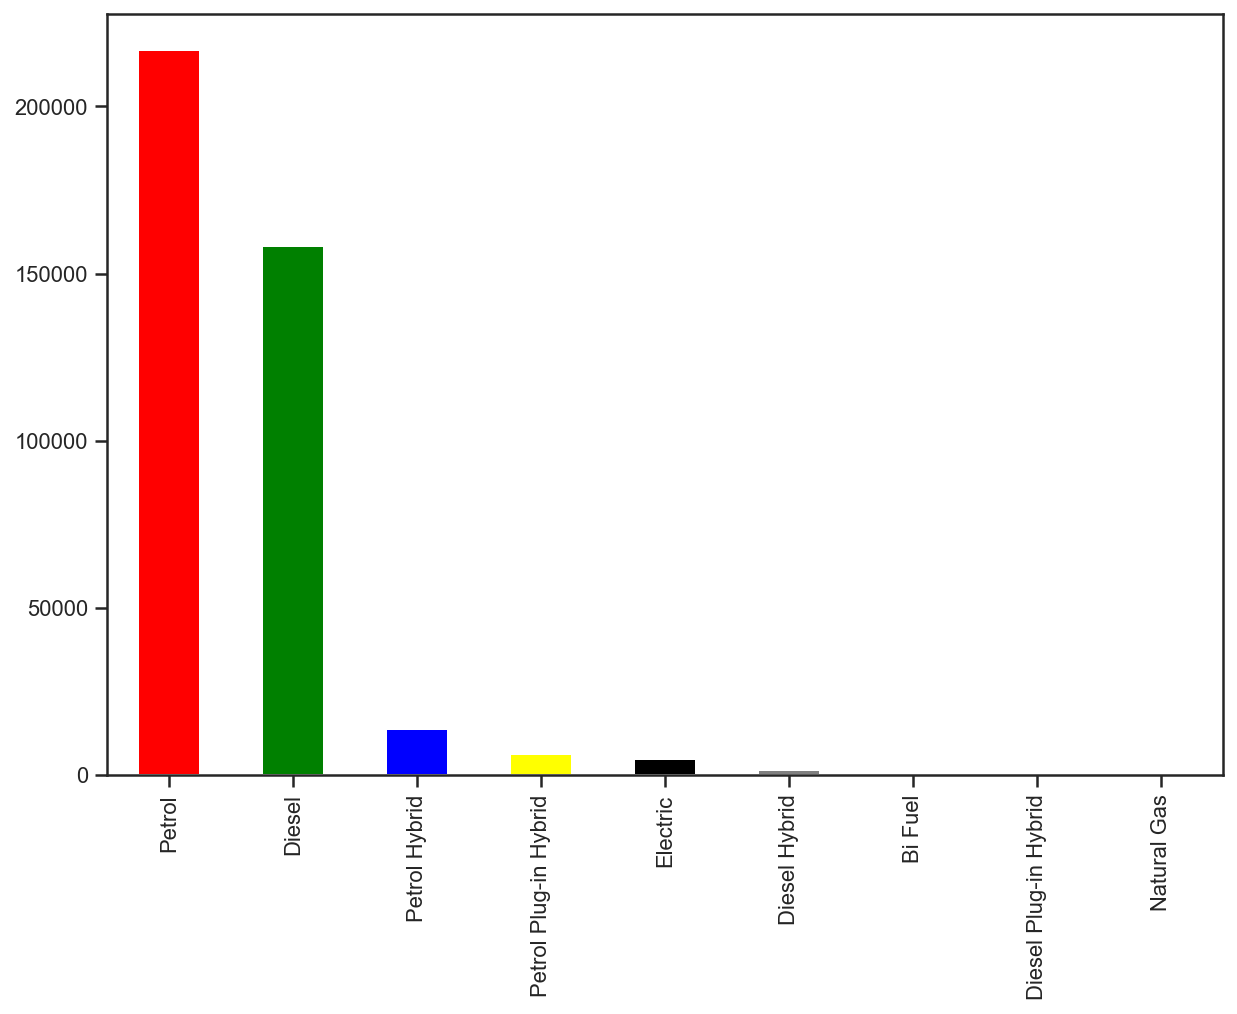

In [19]:
# Visuaizing the distribution of fuel type.
plt.figure(figsize=(10,7))

auto['fuel_type'].value_counts().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'black', 'grey'])

* From the plot, it appears that there are more petrol cars in the dataset than any other fuel type.
* In addition to petrol vehicles, there are a significant number of diesel vehicles when compared to other fuel types.

### Vehicle condition

In [20]:
# Summary statistics of vehicle condition
auto['vehicle_condition'].describe()

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object

* The majority of the vehicles in the data set are in use.
* The count of 402005 shows that there are no missing values.
* There are 370756 used cars in the dataset and 31249 new cars

<AxesSubplot:xlabel='vehicle_condition', ylabel='count'>

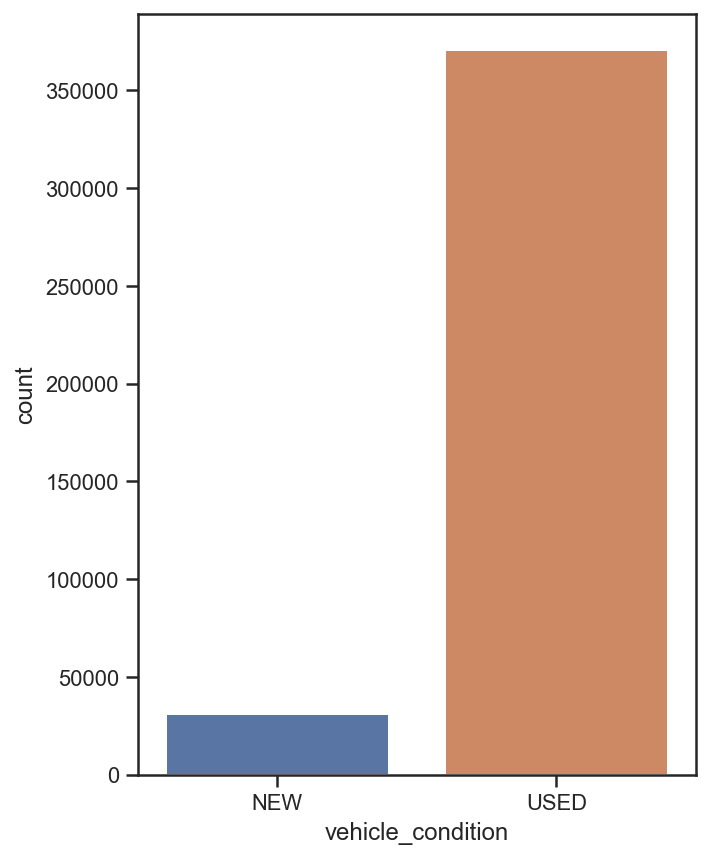

In [21]:
# Visuaizing the distribution of vehicle condition
plt.figure(figsize=(5,7))
sns.countplot(data=auto, x='vehicle_condition')

* The distribution plot validates the amount and frequency of vehicle conditions as stated in the describe() method. There are more used cars than new cars in the dataset.

### Year of registration

In [22]:
# Summary statistics of vehicle condition
auto['year_of_registration'].describe()

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

* The most recently bought cars were registered in 2020
* Having a registration year of 999 is probably an error and will be fixed in processing.

<AxesSubplot:xlabel='count', ylabel='year_of_registration'>

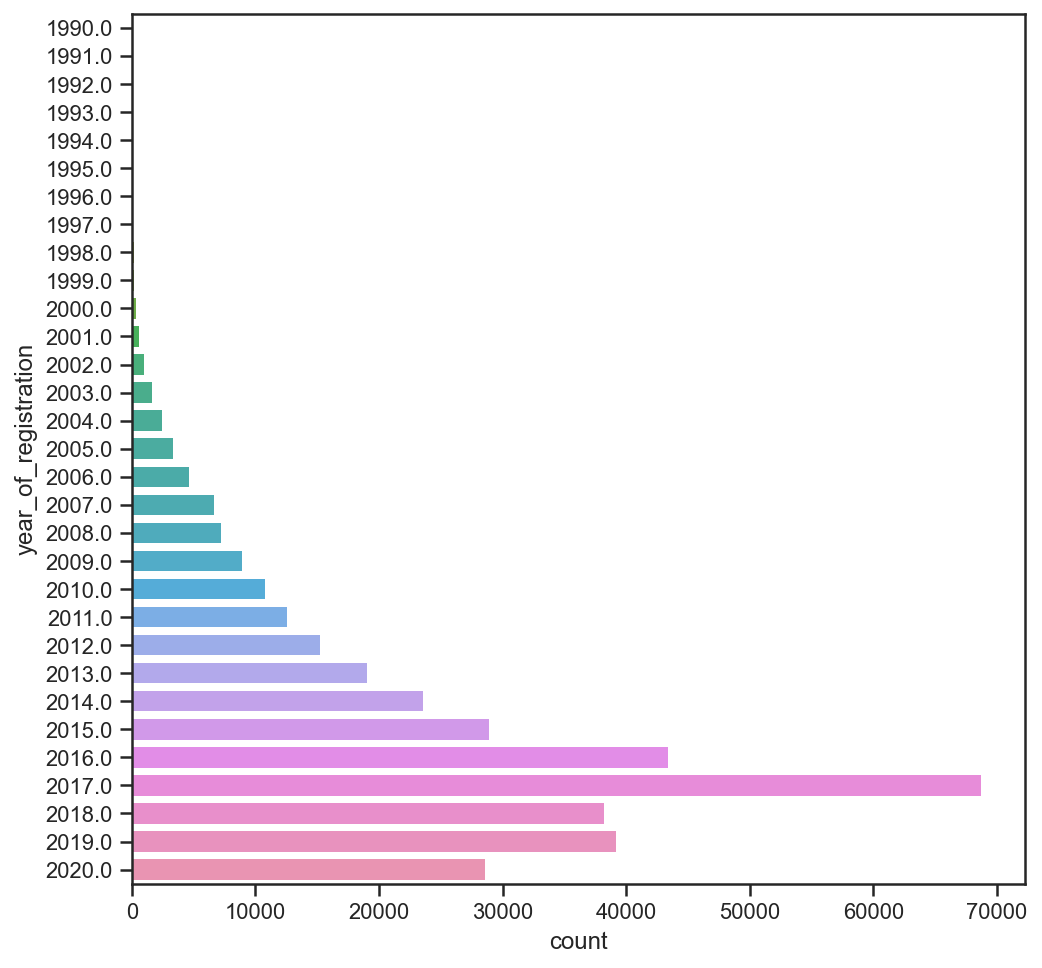

In [23]:
# Visuaizing the distribution of year of registration from 1990 to 2020
plt.figure(figsize=(8,8))
year_subset = auto[(auto['year_of_registration'] >= 1990) & (auto['year_of_registration'] <= 2020)]
sns.countplot(data=year_subset, y='year_of_registration')

* The plot shows that more cars were registered in 2017 compared to other years.

## 1.2. Analysis of Predictive Power of Features

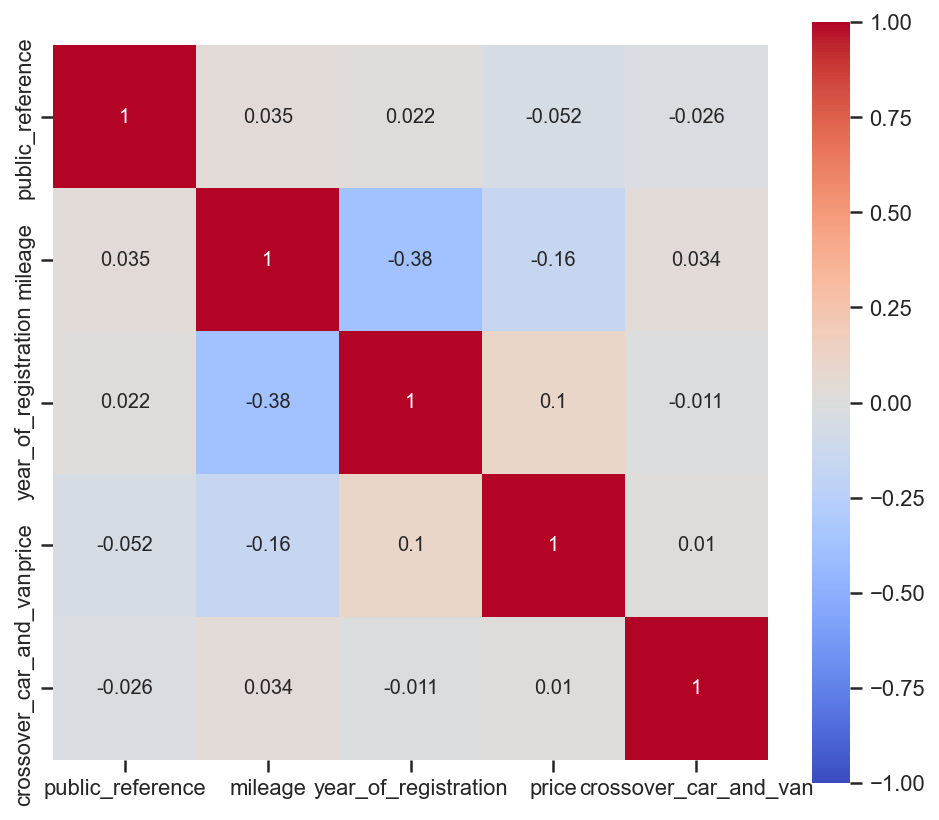

In [24]:
# Checking correlation of numerical columns with price

plt.figure(figsize=(8,7))
sns.heatmap(auto.corr(), square=True, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

* Based on the correlation between numerical features and price shown in the heat map, the ability of these features to predict price appears to be weak. Combining multiple numerical features may be necessary to achieve a stronger predictive power.

* From the distribution analysis. It demonstrates the dominance of petrol cars. On the model prediction, this might have an impact.
* Again, looking at the vehicle condition feature, there are more used cars than new cars. This means that on training the model, there are tendencies that it may perform better on used cars.

 ## 1.3. Data Processing for Data Exploration and Visualisation

<AxesSubplot:>

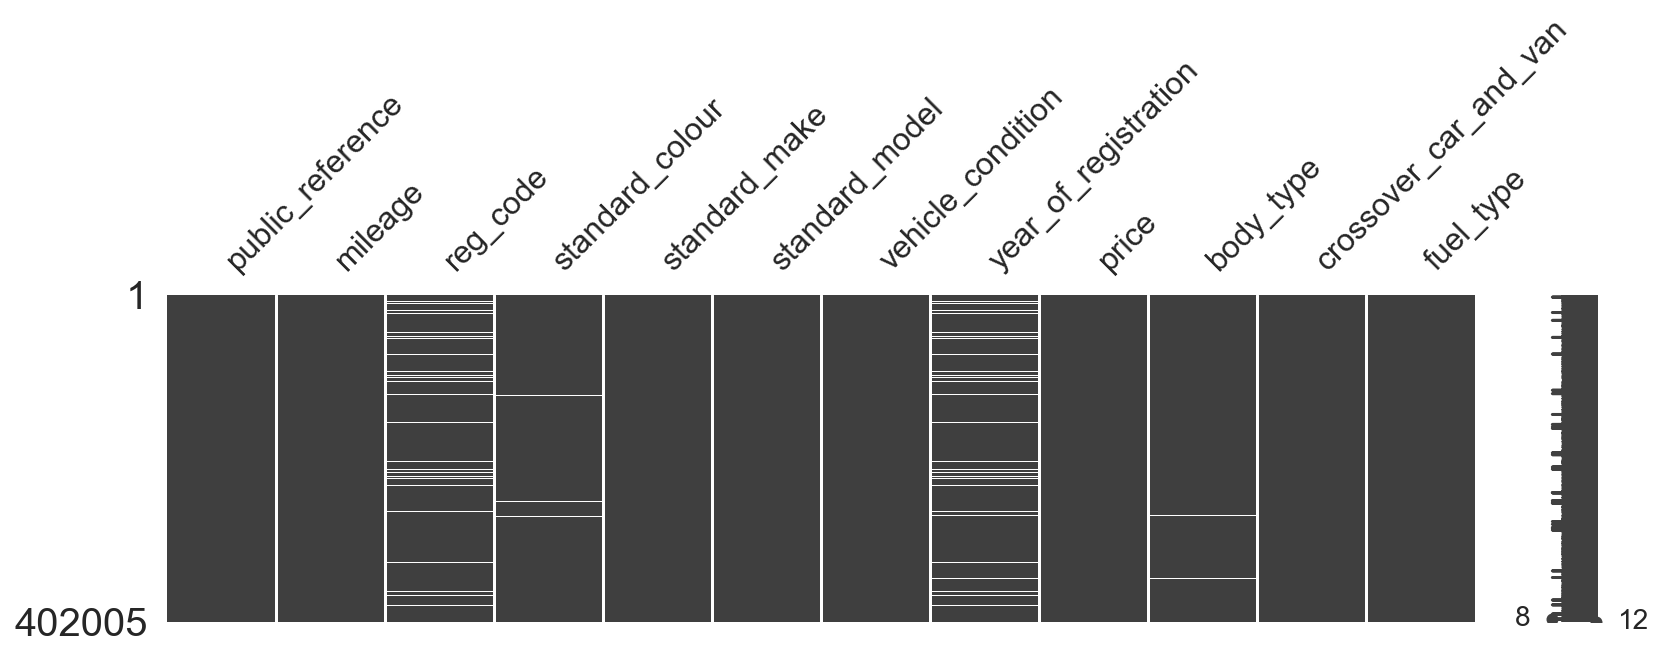

In [27]:
# Visualizing columns with missing values
msno.matrix(auto,figsize=(13,3))

* The plot shows straightaway, that there are missing values in the registration code, standard color, year of registration, and body type.

In [28]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* The actual number of missing values in the mileage, reg_code, standard_color, year_of_registration, body_type, and fuel_type columns can be seen in the difference between the total number of rows in the dataset and the rows of the respective columns.

### Year of registration

In [29]:
# Checking the number of missing values in year of registration
auto[['year_of_registration']].isna().sum()

year_of_registration    33311
dtype: int64

* There are 33,311 missing values in the year of registration.

### Mileage

In [30]:
# Checking the number of missing values in mileage
auto[['mileage']].isnull().sum()

mileage    127
dtype: int64

* There are 127 missing values in mileage.

### Registration code

In [31]:
# Checking the number of missing values in registration code
auto[['reg_code']].isna().sum()

reg_code    31857
dtype: int64

* There are 31,857 missing values in registration code.

 ## 1.3. Identification/Commenting on Outliers and Noise

### Mileage

<AxesSubplot:xlabel='mileage'>

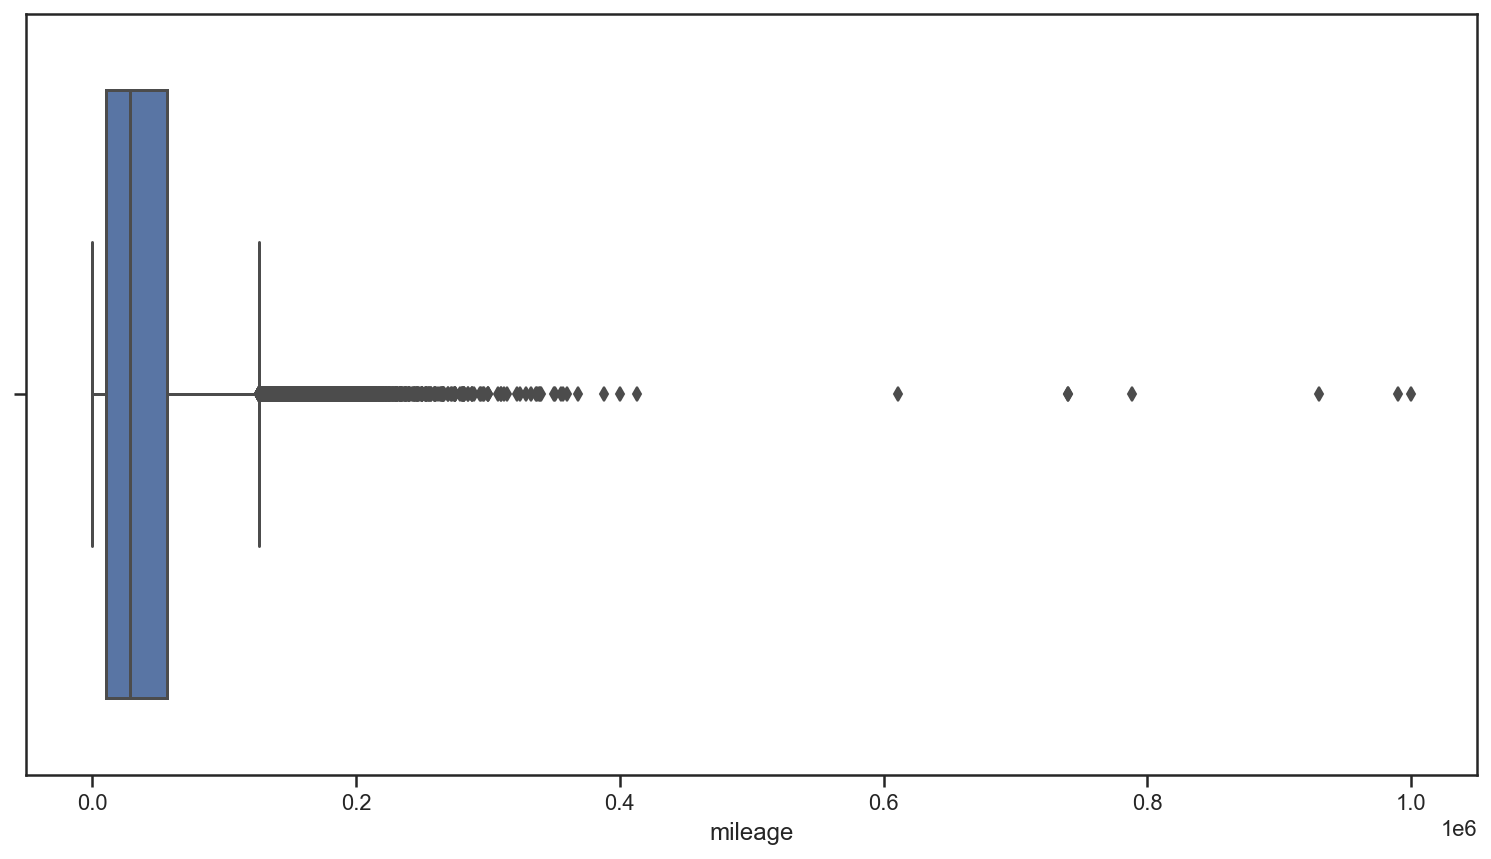

In [32]:
# Visualizing ouliers in mileage.
plt.figure(figsize=(13,7))
sns.boxplot(data=auto, x='mileage')

* The number of outliers in the dataset can be calculated using the "1.5 x IQR rule." 

* According to the "1.5 x IQR rule", outliers are defined as observations that fall outside of the following bounds: **Q1 - 1.5 * IQR <= Outlier <= Q3 + 1.5 * IQR** i.e. **Outliers = Total data points - (Total datapoints >= Q1 - 1.5 * IQR and <= Q3 + 1.5)** 
* IQR = interquartile range, is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset.

In [33]:
# Calculating the Interquartile range
Q1 = auto['mileage'].quantile(0.25)
Q3 = auto['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Finding Non-outliers
non_outliers = (auto.mileage[(auto['mileage'] >= (Q1 - 1.5 * IQR)) & (auto['mileage'] <= (Q3 + 1.5 * IQR))]).count()
non_outliers

# Finding Outliers
outliers = auto.mileage.count() - non_outliers
outliers

8181

* There are 8,181 outliers in the mileage feature.

### Year of registration

<AxesSubplot:xlabel='year_of_registration'>

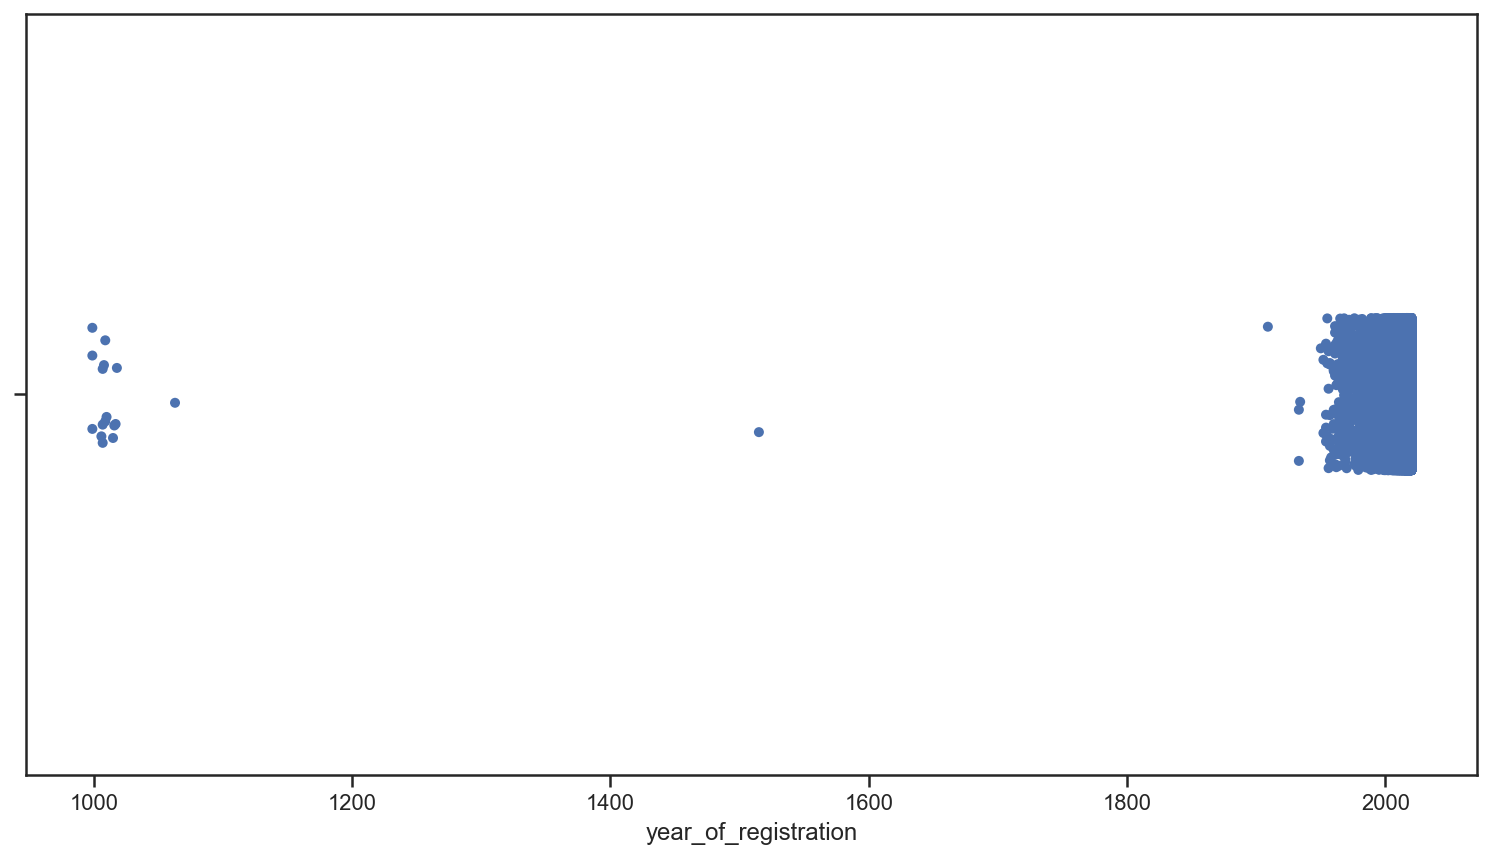

In [34]:
# Visualizing ouliers in year of registration
plt.figure(figsize=(13,7))
sns.stripplot(data=auto, x='year_of_registration')

* From looking at the plot, there are some outliers in the year of registration.
* In addition, car manufacturing began in 1886, according to domain understanding. However, there is the possibility of correcting the values with the information in registration codes.
* Additionally, a significant number of vehicles have a registration year of zero. These may be for new cars.

### Price

<AxesSubplot:xlabel='price'>

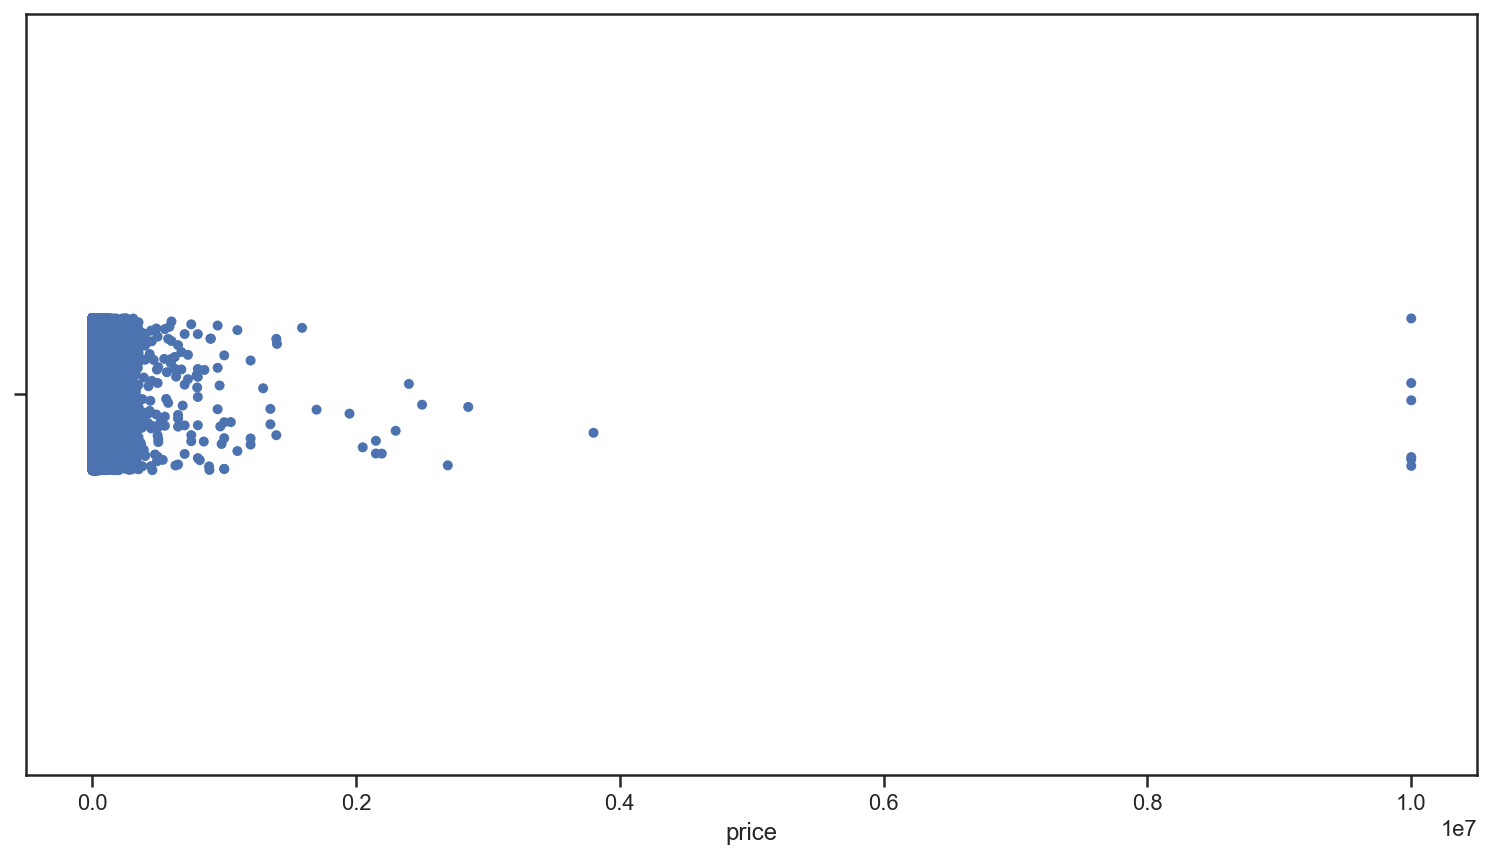

In [35]:
# Visualizing ouliers in price
plt.figure(figsize=(13,7))
sns.stripplot(data=auto, x='price')

There are some outliers in car prices. These are likely to be very expensive cars or error values, following the pattern. 

# 2. Data Processing for Machine Learning

## 2.1. Dealing with Missing Values, Outliers, and Noise

* Before dealing with missing values, there is need to tidy up the objects and take care of the spaces.

In [36]:
# Objects columns:
object_columns = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 
                  'body_type', 'fuel_type']

# Tidying up the object columns
auto['standard_colour'] = auto.standard_colour.str.lower().replace(' ','_')
auto['standard_make'] = auto.standard_make.str.lower().replace(' ','_')
auto['standard_model'] = auto.standard_model.str.lower().replace(' ','_')
auto['vehicle_condition'] = auto.vehicle_condition.str.lower().replace(' ','_')
auto['body_type'] = auto.body_type.str.lower().replace(' ','_')
auto['fuel_type'] = auto.fuel_type.str.lower().replace(' ','_')

auto.sample(4)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
120559,202010144999355,62000.0,63,white,nissan,qashqai+2,used,2013.0,7750,suv,False,petrol
135797,202009163791623,1600.0,70,blue,maserati,levante,used,2020.0,66950,suv,False,petrol
278073,202010285513323,44009.0,16,blue,toyota,prius,used,2016.0,13499,hatchback,False,petrol hybrid
220826,202010225306330,42898.0,65,black,vauxhall,corsa,used,2015.0,6250,hatchback,False,petrol


### Year of registration

From domain understanding (Wikipedia, 2023): vehicle registration plates of the United Kingdom. [Online] [Accessed on 22nd December 2022] https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom), there is a relationship between the registration code and the year or registration. 

Following that, the registration code and year of registration will be analyzed jointly to fill in the year of registration's missing values.

In [37]:
# Rows with missing year of registration and registration code.
auto[auto['year_of_registration'].isna() & auto['reg_code'].isna()].shape

(31570, 12)

* There are 31,570 rows with both the year of registration and registration code missing.

In [38]:
# Rows with missing year of registration without missing registration code
auto[auto['year_of_registration'].isna() & auto['reg_code'].notna()].shape

(1741, 12)

* There are 1,741 rows with missing years of registration without missing registration code values.

In [39]:
# Rows where news cars have missing year of registration
auto[(auto['vehicle_condition']=='new') & (auto['year_of_registration'].isna())].shape

(31249, 12)

* There are 31,249 rows where new cars have a missing year of registration. The missing values will be filled with 0. This conclusion is drawn from the domain's understanding that new cars do not have a year of registration as they have not been purchased by a user. Also, the equivalent registration code is 0. 

In [40]:
#Filling rows where news cars have missing year of registration with 0
auto.loc[auto['vehicle_condition']=='new' ,'year_of_registration'] = 0

# Filling the equivalent reg_code with 0
auto.loc[auto['year_of_registration']== 0 ,'reg_code'] = 0

In [41]:
auto.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0,grey,volvo,xc90,new,0.0,73970,suv,False,petrol plug-in hybrid
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011.0,7000,saloon,False,diesel


In [42]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               401397 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   399943 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


* After filing the rows where news cars have missing year of registration with 0 and also filling the equivalent reg_code with 0, it can be observed from the info() method that there are still rows with reg_code that have a missing year of registration.

In [43]:
# Checking the rows with registration code and missing year of registration.
auto[(auto['reg_code'].notna()) & (auto['year_of_registration'].isna())].shape

(1741, 12)

* There are 1,741 rows with registration codes that have missing year of registration.

In fixing the rows with reg_code that have missing year of registration, it will make sense at this stage to drop all the rows with missing year of registration and registration code first, before moving forward. From domain understanding, there are no ways of filling those rows; except trying to seek the information from the business owners directly.

In [44]:
# Rows with missing year of registration and registration code
auto[(auto['reg_code'].isna()) & (auto['year_of_registration'].isna())].shape

(321, 12)

In [45]:
# Dropping rows with missing year of registration and registration code
auto = auto.loc[~((auto['reg_code'].isna()) & (auto['year_of_registration'].isna()))]

In [46]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401684 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401684 non-null  int64  
 1   mileage                401569 non-null  float64
 2   reg_code               401397 non-null  object 
 3   standard_colour        396332 non-null  object 
 4   standard_make          401684 non-null  object 
 5   standard_model         401684 non-null  object 
 6   vehicle_condition      401684 non-null  object 
 7   year_of_registration   399943 non-null  float64
 8   price                  401684 non-null  int64  
 9   body_type              400906 non-null  object 
 10  crossover_car_and_van  401684 non-null  bool   
 11  fuel_type              401091 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


* After dropping the rows with missing year of registration and registration code, there are a total of 401,684 rows and 12 columns.
* There are still some missing values in the "year of registration" column. The registration code will be engineered to fill in the values. 

In [47]:
# Checking the unique values of registration code
auto['reg_code'].unique()

array([0, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', nan, 'X', 'D',
       'S', 'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P',
       'A', 'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95',
       's', '38', 'k', '37', 'p'], dtype=object)

* It can be observed that there are still rows with missing registration codes (nan). 
* At this stage: 
1. Using the information provided in the domain understanding, the registration codes are filled with the year of registration
2. The missing values in the year of registration are then filled with the corresponding registration code afterward.

In [48]:
# Creating a subset of rows with year of registration and missing registration code (mxx_reg_code)
mxx_reg_code = auto[auto['year_of_registration'].notna() & auto['reg_code'].isna()][['year_of_registration', 'reg_code']]
mxx_reg_code.head(3)

,year_of_registration,reg_code
630,2019.0,NaN
682,2006.0,NaN
1131,2004.0,NaN


In [49]:
# Shape of mxx_reg_code
mxx_reg_code.shape

(287, 2)

* There are 287 of such rows

In [50]:
# Checking the unique values of mixx_reg_code
mxx_reg_code['year_of_registration'].unique()

array([2019., 2006., 2004., 2017., 2018., 2020., 2005., 1962., 2015.,
       2007., 2010., 2009., 2000., 2013., 1933., 1998., 2012., 1961.,
       2008., 1997., 2016., 1957., 2002., 1999., 2014., 1988., 1954.,
       1955., 1963., 2011., 1960., 1956., 2003., 1959., 1990., 1992.,
       1958., 1950., 1966., 1994., 1973., 1987., 1964., 1995., 1952.,
       2001., 1991.])

In [51]:
mapping_dictionary1 = {2019.0 : '19',2006.0 : '55', 2004.0 : '04', 2017.0 : '17', 2018.0 : '67', 2020.0 : '20', 2005.0 : '05',
       1962.0 : 'NIL', 2015.0 : '64', 2007.0 : '07', 2010.0: '10', 2009.0 : '09', 2000.0 : 'Y', 2013.0 : '13', 
       1933.0 : 'NIL', 1998.0 : 'S', 2012.0 : '61', 1961.0: 'NIL',2008.0 : '57', 1997.0 : 'R', 2016.0 : '65', 
       1957.0 : 'NIL', 2002.0 : '02', 1999.0 : 'T', 2014.0 : '14', 1988.0 : 'R', 1954.0 : 'NIL', 1955.0 : 'NIL', 
       1963.0 : 'A', 2011.0 : '11', 1960.0 : 'NIL', 1956.0 : 'NIL', 2003.0 : '03', 1959.0 : 'NIL', 1990.0 : 'G', 
       1992.0 : 'K',1958.0: 'NIL', 1950.0 : 'NIL', 1966.0 : 'D', 1994.0 : 'L', 1973.0 : 'L', 1987.0: 'D', 
       1964.0 : 'B', 1995.0 : 'M', 1952.0 : 'NIL', 2001.0 : 'Y', 1991.0 : 'H'}

* A dictionary of the unique values of the registration code in subset mxx_reg_code (i.e rows with missing registration code without missing year of registration) is created. The keys are the unique years and the values are the associated registration codes from the age and year identifier tables from the domain understanding. 
* According to the information provided, the registration code for years above 1963 was discontinued and, hence, has no definite value. As a result, the values were represented as "NIL" and were dropped following mapping.

In [52]:
# Mapping the year of registration column with mapping_dictionary1 and assigning it to the original dataset
mxx_reg_code['reg_code'] = mxx_reg_code['year_of_registration'].map(mapping_dictionary1)

In [53]:
# Checking the shape of rows with 'NIL'
mxx_reg_code[mxx_reg_code['reg_code'] == 'NIL'].shape

(42, 2)

In [54]:
#Joining the mapped dataset with the original dataframe
auto.loc[(auto['year_of_registration'].notna()) & (auto['reg_code'].isna()), ['year_of_registration', 'reg_code']] = mxx_reg_code

In [55]:
# Dropping the rows with 'NIL' registration code
auto = auto.loc[~((auto['reg_code'] == 'NIL'))]

In [56]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401642 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401642 non-null  int64  
 1   mileage                401528 non-null  float64
 2   reg_code               401642 non-null  object 
 3   standard_colour        396294 non-null  object 
 4   standard_make          401642 non-null  object 
 5   standard_model         401642 non-null  object 
 6   vehicle_condition      401642 non-null  object 
 7   year_of_registration   399901 non-null  float64
 8   price                  401642 non-null  int64  
 9   body_type              400872 non-null  object 
 10  crossover_car_and_van  401642 non-null  bool   
 11  fuel_type              401055 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


###### After dealing with the rows left with missing registration codes (nan), The.info() method reveals the following:
    1. The total number of rows and columns is now 401,642 and 12 respectively
    2. There are no more missing values in the registration code.
    3. At this stage, the registration codes are used to fill in the missing values for the year of registration.

In [57]:
# Checking the rows with registration code but missing year of registration 
auto[auto['year_of_registration'].isna()].shape

(1741, 12)

To fill in the missing values of the year of registration with the registration codes:
1. A copy of the original dataframe is created, with all rows missing year_of_registration dropped.
2. The dataframe copy is grouped by the reg_code column.
3. The mode of the year_of_registration column for each group is calculated and converted from a series to a dataframe. Missing values are dropped.
4. A dictionary with reg_code as the key and the mode of the year_of_registration as the value is created.
5. The missing values in the year_of_registration column are then filled by mapping the values in the reg_code column to the corresponding values in the dictionary.

In [58]:
# Creating a copy of the original dataFrame with all rows having missing year_of_registration dropped.
auto_ndrop = auto[~auto['year_of_registration'].isna()]

In [59]:
# Grouping the copy by the reg_code column
auto_ndrop_grp = auto_ndrop.groupby('reg_code')['year_of_registration']

In [60]:
from scipy import stats

# Calculating the mode of the year_of_registration column for each group, converting to a dataframe and dropping any missing values
auto_ndrop_mode = auto_ndrop_grp.agg(lambda x: stats.mode(x)[0][0]).to_frame().dropna()

In [61]:
# Creating a dictionary with reg_code as key and the mode of the year_of_registration as value
auto_ndrop_mode_dict = dict(zip(auto_ndrop_mode.index, auto_ndrop_mode.loc[:,'year_of_registration']))

In [62]:
# Filling the the year_of_registration column by mapping the values in the reg_code column to the corresponding values in the dictionary and assigning it to original data frame.
auto.loc[:,'year_of_registration'] = auto.loc[:,'year_of_registration'].fillna(auto.loc[:,'reg_code'].map(auto_ndrop_mode_dict))

In [63]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401642 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401642 non-null  int64  
 1   mileage                401528 non-null  float64
 2   reg_code               401642 non-null  object 
 3   standard_colour        396294 non-null  object 
 4   standard_make          401642 non-null  object 
 5   standard_model         401642 non-null  object 
 6   vehicle_condition      401642 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401642 non-null  int64  
 9   body_type              400872 non-null  object 
 10  crossover_car_and_van  401642 non-null  bool   
 11  fuel_type              401055 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


After filing the missing year of registration rows with the registration code, it is observed that there are still 9 rows with missing year of registration.

In [64]:
# Checking the 9 rows with missing values.
auto[auto['year_of_registration'].isna()]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
9940,202010225293464,32001.0,94,orange,renault,captur,used,NaN,7400,suv,False,petrol
28559,202010215252376,58686.0,85,black,hyundai,i30,used,NaN,6900,NaN,False,diesel
80899,202010014455127,2000.0,CA,green,caterham,seven,used,NaN,21995,convertible,False,petrol
166035,202010195172029,4050.0,723xuu,turquoise,chevrolet,corvette,used,NaN,89990,NaN,False,petrol
167430,202010225293472,55643.0,95,grey,citroen,ds4,used,NaN,6800,hatchback,False,diesel
231213,202010225293467,61370.0,94,black,vauxhall,mokka,used,NaN,7450,NaN,False,diesel
265390,201912315687909,23157.0,38,black,mercedes-benz,e class,used,NaN,26550,NaN,False,diesel
329449,202010225293425,39312.0,95,silver,renault,captur,used,NaN,8000,suv,False,petrol
357325,202010215252378,31487.0,37,white,suzuki,baleno,used,NaN,6950,NaN,False,petrol


* Although the missing year of registration rows with registration codes 37 and 38 can be filled from the age identifiers table (from domain understanding), I think it is fairly insignificant compared to the number of available datapoints, so it is dropped.
* The other 7 rows are dropped as well, as there is not enough information to determine the corresponding registration codes.

In [65]:
# Dropping the 9 rows with missing values.
auto = auto[~auto['year_of_registration'].isna()]

#### Dealing with year of registration below 1886 and not equal to 0(new cars)

In [66]:
# Creating a subset for cars with with year of registration below 1886 and not equal to 0(new cars)
below_1886 = auto[(auto.loc[:,'year_of_registration'] < 1886) & (auto.loc[:,'year_of_registration'] != 0)]
below_1886.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,07,blue,toyota,prius,used,1007.0,7000,hatchback,False,petrol hybrid
69516,202010155035879,96659.0,65,black,audi,a4 avant,used,1515.0,10385,estate,False,diesel


In [67]:
# Getting the unique values of the subset
below_1886['reg_code'].unique()

array(['07', '65', '63', '59', '66', '10', '08', '68', '64', '57', '17',
       '13', '55'], dtype=object)

In [68]:
# Creating a dictionary of the unique values of the subset for mapping.
mapping_dictionary2 = {'07' : 2007, '65' : 2015, '63' : 2013, '59' : 2009, '66' : 2016, '10' : 2010, '08' : 2008,
       '68' : 2018, '64' : 2014, '57' : 2007, '17': 2017, '13' : 2013, '55' : 2005}

In [69]:
# Mapping the registration code column with mapping_dictionary2 and equating to the year of registration
pd.options.mode.chained_assignment = None
below_1886.loc[:,'year_of_registration'] = below_1886.loc[:,'reg_code'].map(mapping_dictionary2)

In [70]:
# Imputing the mapped data into the original dataset
auto[(auto['year_of_registration'] < 1886) & (auto['year_of_registration'] != 0)] = below_1886

In [71]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401633 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401519 non-null  float64
 2   reg_code               401633 non-null  object 
 3   standard_colour        396285 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              400868 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401046 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


* After dealing with the missing values and noise of the registration code and year of registration, the shape of the dataframe is (401633,12). 
There are still missing values in the mileage, standard_color, body_type, and fuel_type columns. 

### Mileage, Standard colour, Body type, and Fuel type

In [72]:
# Checking that there are no new cars with missing mileages
auto[auto['mileage'] == 'NEW'].isna()

# Filling the missing values in mileage with the total mode mileages of used cars
auto['mileage'] = auto['mileage'].fillna((auto['mileage'] == 'used').mode()[0])

In [73]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401633 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401633 non-null  object 
 2   reg_code               401633 non-null  object 
 3   standard_colour        396285 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              400868 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401046 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 37.2+ MB


In [74]:
# Filling the missing values in standard_colour with the mode
auto['standard_colour'] = auto['standard_colour'].fillna(auto['standard_colour'].mode()[0])

# Filling the missing values in body_type with the mode
auto['body_type'] = auto['body_type'].fillna(auto['body_type'].mode()[0])

# Filling the missing values in fuel_type with the mode
auto['fuel_type'] = auto['fuel_type'].fillna(auto['fuel_type'].mode()[0])

* The missing values in standard_colour, body_type and fuel_type are filled with the mode of the each column. 

In [75]:
# Reseting index
auto = auto.reset_index(drop=True)

<AxesSubplot:>

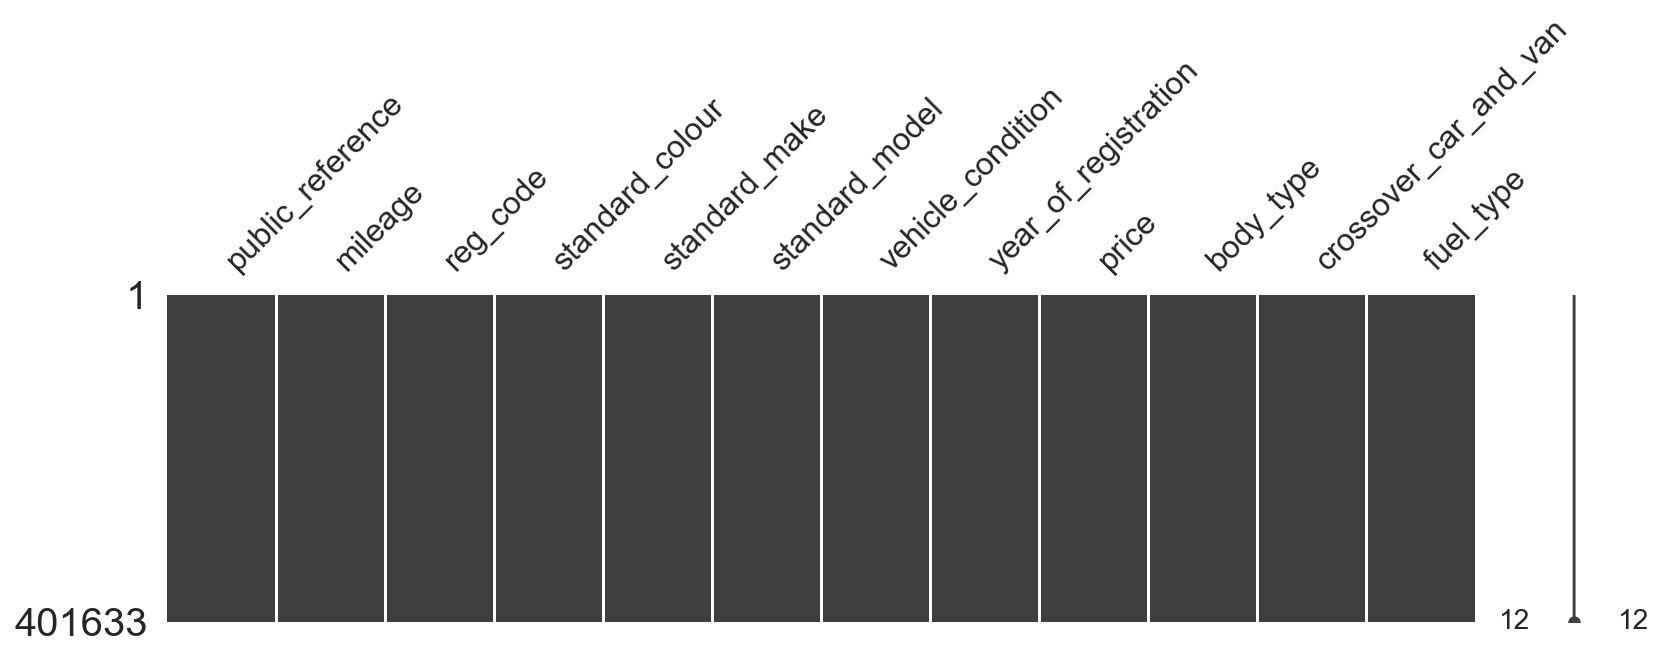

In [76]:
# Checking for any column still having missing values
msno.matrix(auto,figsize=(13,3))

In [77]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401633 entries, 0 to 401632
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401633 non-null  int64  
 1   mileage                401633 non-null  object 
 2   reg_code               401633 non-null  object 
 3   standard_colour        401633 non-null  object 
 4   standard_make          401633 non-null  object 
 5   standard_model         401633 non-null  object 
 6   vehicle_condition      401633 non-null  object 
 7   year_of_registration   401633 non-null  float64
 8   price                  401633 non-null  int64  
 9   body_type              401633 non-null  object 
 10  crossover_car_and_van  401633 non-null  bool   
 11  fuel_type              401633 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 34.1+ MB


* All missing values have been handled. Data shape is 401633, 12

## 2.2. Feature Engineering, Data Transformations, Feature Selection


#### Removing the trailing zeros in the year of registration column and type casting mileage column to float

In [78]:
auto.head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0,grey,volvo,xc90,new,0.0,73970,suv,False,petrol plug-in hybrid
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011.0,7000,saloon,False,diesel
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017.0,14000,suv,False,petrol


In [79]:
# Removing the trailing zeros in the year_of registration column and type casting to int
auto.loc[:,'year_of_registration'] =  auto.loc[:,'year_of_registration'].apply(int)

# Type casting the mileage column to float
auto.loc[:,'mileage']= auto.loc[:, 'mileage'].astype('float')

In [80]:
auto[['year_of_registration']].head(3)

,year_of_registration
0,0
1,2011
2,2017


#### Creating age category column

In [81]:
# Creating a function to calculate nd create car age column

def age_column(auto, year_of_registration):
    current_year = year_of_registration.max()
  
    auto.loc[:,'car_age'] = current_year - auto.loc[:,'year_of_registration'].where(auto.loc[:,'year_of_registration']!=0,2020)
    
    return auto

In [82]:
age_column(auto, auto.loc[:,'year_of_registration']).head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age
0,202006039777689,0.0,0,grey,volvo,xc90,new,0,73970,suv,False,petrol plug-in hybrid,0
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011,7000,saloon,False,diesel,9
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017,14000,suv,False,petrol,3


#### Creating make_fuel_type category column

In [83]:
# Function to create the make_fuel_type column
def make_fuel_type(auto):
    return auto['standard_make'] + '_' + auto['fuel_type']

auto['make_fuel_type'] = auto.apply(make_fuel_type, axis=1)

In [84]:
auto.head(3)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,make_fuel_type
0,202006039777689,0.0,0,grey,volvo,xc90,new,0,73970,suv,False,petrol plug-in hybrid,0,volvo_petrol plug-in hybrid
1,202007020778260,108230.0,61,blue,jaguar,xf,used,2011,7000,saloon,False,diesel,9,jaguar_diesel
2,202007020778474,7800.0,17,grey,skoda,yeti,used,2017,14000,suv,False,petrol,3,skoda_petrol


### Splitting data and Encoding

In [85]:
from sklearn.compose import make_column_transformer

In [86]:
from sklearn.compose import ColumnTransformer

In [87]:
# Creating a sample of the train dataset
auto_sample = auto.sample(frac=0.5, random_state=42)
X_sample = auto_sample.drop(columns=['price', 'reg_code', 'public_reference'])
y_sample = auto_sample['price']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=100)

### Target Encode Categorical Features (standard_make, standard_model, make_fuel_type)

In [89]:
# Importing target encoder
from category_encoders import TargetEncoder
tge = TargetEncoder()

In [90]:
X_train[['standard_make', 'standard_model','make_fuel_type']] = tge.fit_transform(X_train[['standard_make', 'standard_model','make_fuel_type']], y_train)

In [91]:
X_test[['standard_make', 'standard_model','make_fuel_type']] = tge.transform(X_test[['standard_make', 'standard_model','make_fuel_type']])

### One-hot-Encoding (standard_colour, vehicle_condition, body_type, crossover_car_and_van, fuel_type)

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
# Creating an instance of the OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fitting encoder to the train set
X_train_encoded = ohe.fit_transform(X_train[["standard_colour", "vehicle_condition", 
                                             "body_type", "crossover_car_and_van","fuel_type"]])

# Transforming on the test set
X_test_encoded = ohe.transform(X_test[["standard_colour", "vehicle_condition", 
                                             "body_type", "crossover_car_and_van","fuel_type"]])

In [94]:
# Converting the one-hot encoded X_train_sample back to a dataframe
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), index=X_train.index,
                                 columns=ohe.get_feature_names_out(["standard_colour","vehicle_condition", 
                                                                    "body_type", "crossover_car_and_van","fuel_type"]))

# Converting the one-hot encoded X_test_sample_encoded back to a dataframe
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), index=X_test.index,
                                 columns=ohe.get_feature_names_out(["standard_colour","vehicle_condition", 
                                                                    "body_type", "crossover_car_and_van","fuel_type"]))

In [95]:
# Add encoded-result of X_train_sample dataframe to the original X_train_sample dataframe
X_train = pd.concat([X_train, X_train_encoded], axis=1)

# Add encoded-result of X_train dataframe to the original X_train dataframe
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [96]:
# Dropping the original categorical columns after encoding including reg code
X_train = X_train.drop(["standard_colour", "vehicle_condition",
                  "body_type", "crossover_car_and_van", "fuel_type"], axis=1)

# Dropping the original categorical columns after encoding including reg code
X_test = X_test.drop(["standard_colour", "vehicle_condition",
                  "body_type", "crossover_car_and_van", "fuel_type"], axis=1)

### Scaling (mileage, standard_make, standard_model, make_fuel_type and year_of_registration)

In [97]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train[['mileage', 'standard_make', 'standard_model','make_fuel_type', 'year_of_registration']])

# Scale the selected columns of the test data
X_train[['mileage', 'standard_make', 'standard_model','make_fuel_type', 'year_of_registration']] = scaler.transform(X_train[['mileage', 'standard_make', 'standard_model','make_fuel_type', 'year_of_registration']])
X_test[['mileage', 'standard_make', 'standard_model','make_fuel_type', 'year_of_registration']] = scaler.transform(X_test[['mileage', 'standard_make', 'standard_model','make_fuel_type', 'year_of_registration']])

# 3. MODEL BUILDING

In [98]:
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

## 3.1. Algorithm Selection, Model Instantiation and Configuration


### Linear regressor

In [99]:
linear_reg = LinearRegression()

start = time.time()

linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

end=time.time()
time_linear_reg=end-start
print(f'the time {time_linear_reg} secs')

Accuracy on Traing set:  0.5097158811266099
Accuracy on Testing set:  0.5384485287063192
		Error Table
Mean Absolute Error      :  5519.249127374562
Mean Squared Error       :  277746057.21393913
Root Mean Squared Error  :  16665.715022582714
R Squared Error          :  0.5384485287063192
the time 0.22739052772521973 secs


### RandomForestRegressor

In [100]:
rfr = RandomForestRegressor()

start = time.time()

rfr.fit(X_train, y_train)

y_pred= rfr.predict(X_test)
print("Accuracy on Traing set: ",rfr.score(X_train,y_train))
print("Accuracy on Testing set: ",rfr.score(X_test,y_test))


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))


end=time.time()
time_rfr=end-start
print(f'the time {time_rfr} secs')

Accuracy on Traing set:  0.972455862322986
Accuracy on Testing set:  0.7779308704219549
		Error Table
Mean Absolute Error      :  2163.599531407405
Mean Squared Error       :  133633687.69327952
Root Mean Squared Error  :  11560.003792961295
R Squared Error          :  0.7779308704219549
the time 89.91395044326782 secs


### Decision Tree Regressor

In [101]:

dtree = DecisionTreeRegressor(max_depth=4)

start = time.time()

dtree.fit(X_train, y_train)

y_pred= dtree.predict(X_test) 
print("Accuracy on Traing set: ",dtree.score(X_train,y_train))
print("Accuracy on Testing set: ",dtree.score(X_test,y_test))


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

end=time.time()
time_dtree=end-start
print(f'the time {time_dtree} secs')



# from sklearn.tree import export_text
# export_text(dtree, feature_names=X_train.columns.tolist())

Accuracy on Traing set:  0.7635374790381628
Accuracy on Testing set:  0.576065721869155
		Error Table
Mean Absolute Error      :  6133.716799595461
Mean Squared Error       :  255109303.2780281
Root Mean Squared Error  :  15972.141474393096
R Squared Error          :  0.576065721869155
the time 0.39495396614074707 secs


### XG Boost

In [102]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

start = time.time()

xgb.fit(X_train, y_train)

y_pred= xgb.predict(X_test)
print("Accuracy on Traing set: ",xgb.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb.score(X_test,y_test))


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

end=time.time()
time_xgb=end-start
print(f'the time {time_xgb} secs')

Accuracy on Traing set:  0.9793474534338241
Accuracy on Testing set:  0.7818106923797101
		Error Table
Mean Absolute Error      :  2385.407272313025
Mean Squared Error       :  131298942.12646723
Root Mean Squared Error  :  11458.575047817561
R Squared Error          :  0.7818106923797101
the time 3.7203497886657715 secs


* Following the model training using a sample size of 50%:
   * The RandomForestRegressor and XGBoost models have similar accuracy on the testing set (0.778 and 0.782 respectively), but the XGBoost model has a slightly higher accuracy. However, the XGBoost model also has a much faster runtime (3.72 seconds) compared to the first model (89.9 seconds). Additionally, both models have similar error metrics, so it would be difficult to distinguish between them based on those values alone. In this case, however, the XGBoost model is chosen due to its faster runtime.

## 3.2. Grid Search, Model Ranking and Selection

### Grid search with XGBoost

In [103]:
# Define the parameter grid to search over
grid_param = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 'max_depth': [5, 7, 8, 9, 10, 11, 13] }

# # Create an instance of the XGBRegressor model
# xgb = XGBRegressor()

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(xgb, grid_param, cv=3, n_jobs=-1, verbose=1, 
                          return_train_score=True, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

gs_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
gs_results[['param_max_depth', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 13}
Best accuracy found:  -2104.4296859670353


,param_max_depth,mean_train_score,mean_test_score,rank_test_score
13,13,-1196.774601,-2104.429686,1
6,13,-1413.099211,-2111.653879,2
12,11,-1403.855030,-2114.545595,3
19,11,-1274.073063,-2127.862312,4
18,10,-1384.722627,-2135.355667,5
11,10,-1540.148248,-2138.216398,6
20,13,-1025.952145,-2140.906329,7
17,9,-1518.853519,-2160.632898,8
25,10,-1281.090862,-2165.957164,9
23,8,-1542.739577,-2167.818669,10


* Grid search is used to find the best performing parameters of the XGboost model by testing different combinations of the parameters 'learning_rate' and 'max_depth' over 3 different sets of data (folds)
 * The possible values for 'learning_rate' were set to 0.1, 0.2, 0.3, and 0.4, and the possible values for 'max_depth' are 5, 7, 8, 9, 10, 11, and 13.
 * The metric used to evaluate the performance of the model is the negative mean absolute error, and the best accuracy is determined by the highest score.
 * The best set of parameters found by grid search is {'learning_rate': 0.2, 'max_depth': 13}. The performance of the model improves as the parameters are changed across the different folds.

### XGBoost with best grid search parameters

In [104]:
import xgboost as xgb

xgb = xgb.XGBRegressor(learning_rate = 0.2, max_depth=13)

start = time.time()

xgb.fit(X_train, y_train)

y_pred= xgb.predict(X_test)
print("Accuracy on Traing set: ",xgb.score(X_train,y_train))
print("Accuracy on Testing set: ",xgb.score(X_test,y_test))


print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

end=time.time()
time_xgb=end-start
print(f'the time {time_xgb} secs')

Accuracy on Traing set:  0.9945463484888569
Accuracy on Testing set:  0.7775117611547886
		Error Table
Mean Absolute Error      :  2088.3070894114535
Mean Squared Error       :  133885893.46823022
Root Mean Squared Error  :  11570.907201608274
R Squared Error          :  0.7775117611547886
the time 8.390831232070923 secs


* By employing the optimal parameters obtained through grid search on the XGBoost model, there is a small decrease in the R Squared Error, however, a noticeable reduction in the Mean Absolute Error is observed. This can be considered a favorable outcome as the decrease in the R Squared Error is relatively small when compared to the decrease in the Mean Absolute Error.

### Grid search with RandomForestRegressor

In [105]:
# Define the parameter grid to search over
grid_param = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 7, 9, 11]}


# Create an instance of the GridSearchCV
grid_search = GridSearchCV(rfr, grid_param, cv=3, 
                          return_train_score=True, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

gs_results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
gs_results[['param_max_depth', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Best parameters found:  {'max_depth': 11, 'n_estimators': 200}
Best accuracy found:  -2621.8939531080264


,param_max_depth,mean_train_score,mean_test_score,rank_test_score
11,11,-2363.751082,-2621.893953,1
10,11,-2373.576891,-2628.680701,2
9,11,-2375.631289,-2632.894684,3
6,9,-2826.201237,-2993.685975,4
8,9,-2828.830608,-2995.440457,5
7,9,-2829.293856,-3001.857213,6
3,7,-3409.363438,-3508.889315,7
4,7,-3411.675383,-3513.629097,8
5,7,-3413.283891,-3514.109276,9
0,5,-4307.400984,-4366.191121,10


A grid search for RandomForestRegressor is done however, to assertain the best hyperparameters. This is done to to re-evaluate the choice of the XGBoost model as the most suitable model. However, the best parameters found by grid search did not improve the RandomForest model.

# 4. Model Evaluation and Analysis

## 4.1. Coarse-Grained Evaluation/Analysis


### CROSS VALIDATION

In [106]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [107]:
# Setting cv=5
cv=5

# Creating a list for r 2 score
r_2 = []

# Creating a list for CV scores mean
CV = [] 

# Cross validation function
def cross_val(model,X_train,y_train,X_test,y_test): 
    model.fit(X_train,y_train)
    prediction=pd.DataFrame(model.predict(X_test))
    R_2=r2_score(y_test, prediction)
    cross_validation=cross_val_score(model,X_train,y_train,cv=cv)
    
    # Converting results to list
    r_2.append(R_2)
    CV.append(cross_validation.mean())
    
    # Printing cross validation results  
    print(model,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_validation,"\n")
    print("CV scores mean:",cross_validation.mean())
    
    # Prediction vs actual plot
    test_index=y_test.reset_index()["price"]
    ax=test_index.plot(label="actual",figsize=(15,10),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predicted",figsize=(,10),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("Actual VS predicted")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    ax.set_xlim(25, 4000)
    ax.set_ylim(25, 4000)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

r_2 score : 0.7775117611547886 

CV scores: [0.8459096  0.84608999 0.90317516 0.80816837 0.4725101 ] 

CV scores mean: 0.7751706443600639


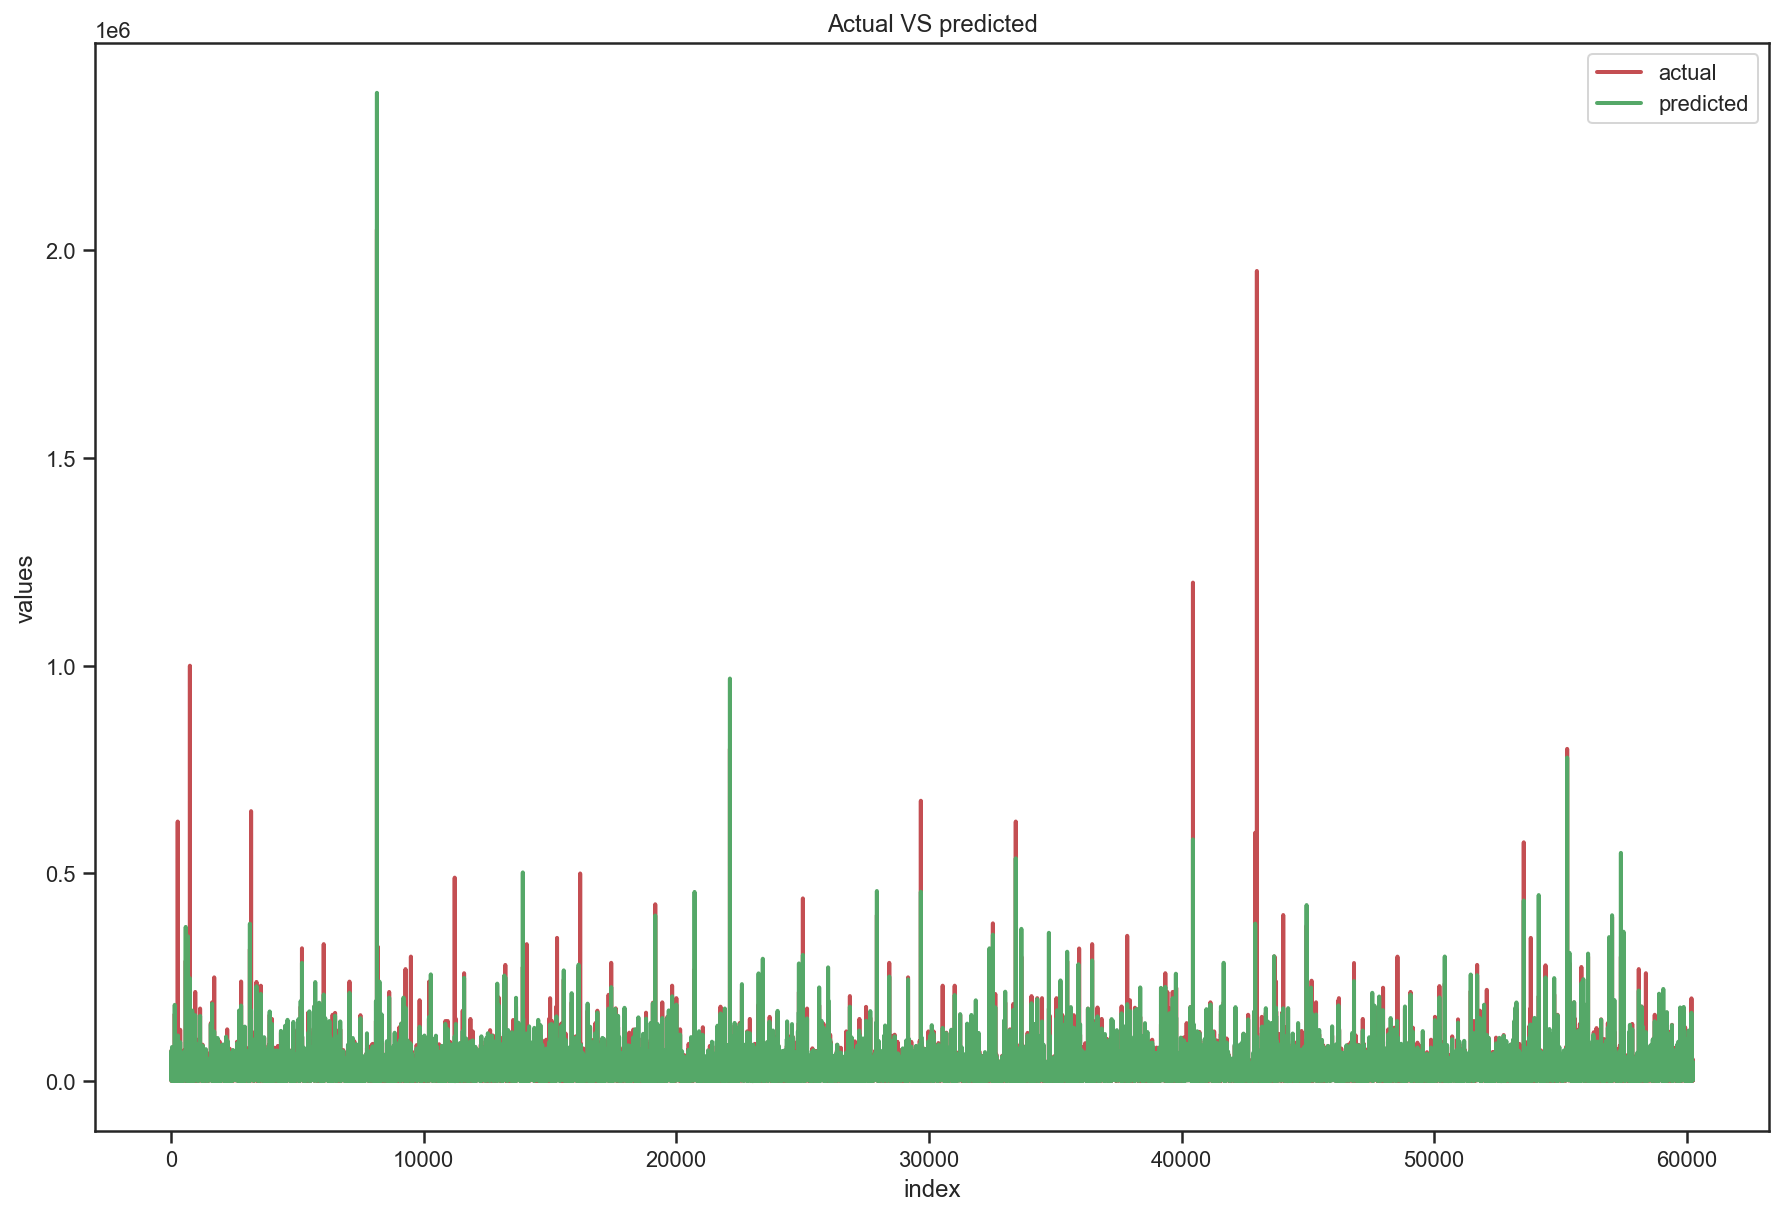

In [108]:
# Cross validation plot
cross_val(xgb,X_train.sample(frac=1, random_state=42),y_train.sample(frac=1, random_state=42), X_test.sample(frac=1, random_state=42), y_test.sample(frac=1, random_state=42))

* The model's performance(XGBoost) was evaluated using cross validation with 5 different folds, and the r_2 score, which measures the model's ability to predict the output variable, was found to be consistent across the folds with only a small deviation. Additionally, the CV scores, which measure the model's performance on each fold, were relatively close to each other, with a mean score of around 0.78. This indicates that the model performs consistently well across different subsets of the data, validating its suitability.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) 

r_2 score : 0.840097480577871 

CV scores: [0.80628235 0.84579109 0.80280648 0.87344099 0.8703661 ] 

CV scores mean: 0.839737405499255


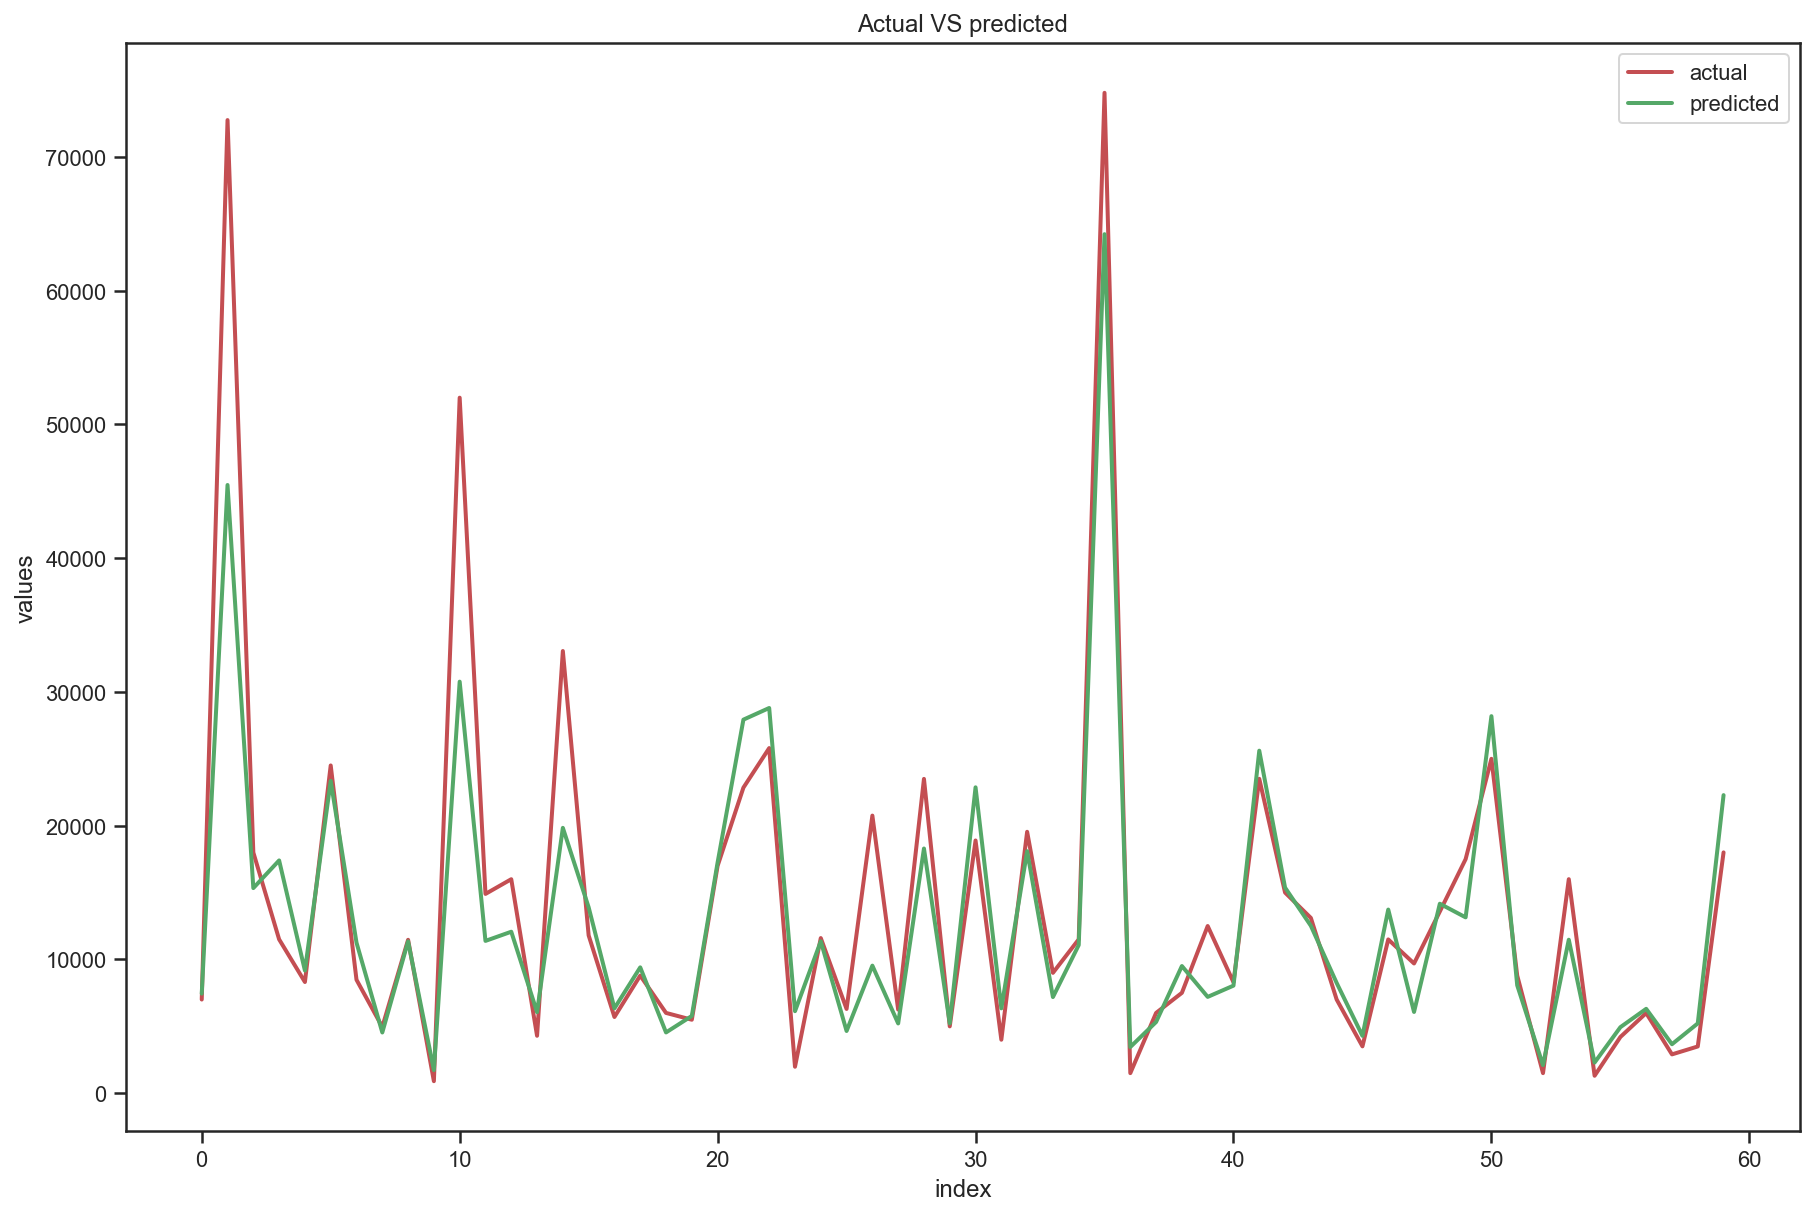

In [109]:
# Sample cross validation plot
Reduced_frac_plot = cross_val(xgb,X_train.sample(frac=0.001, random_state=42),y_train.sample(frac=0.001, random_state=42), X_test.sample(frac=0.001, random_state=42), y_test.sample(frac=0.001, random_state=42))

### Actual Target Value VS Predicted Target Value

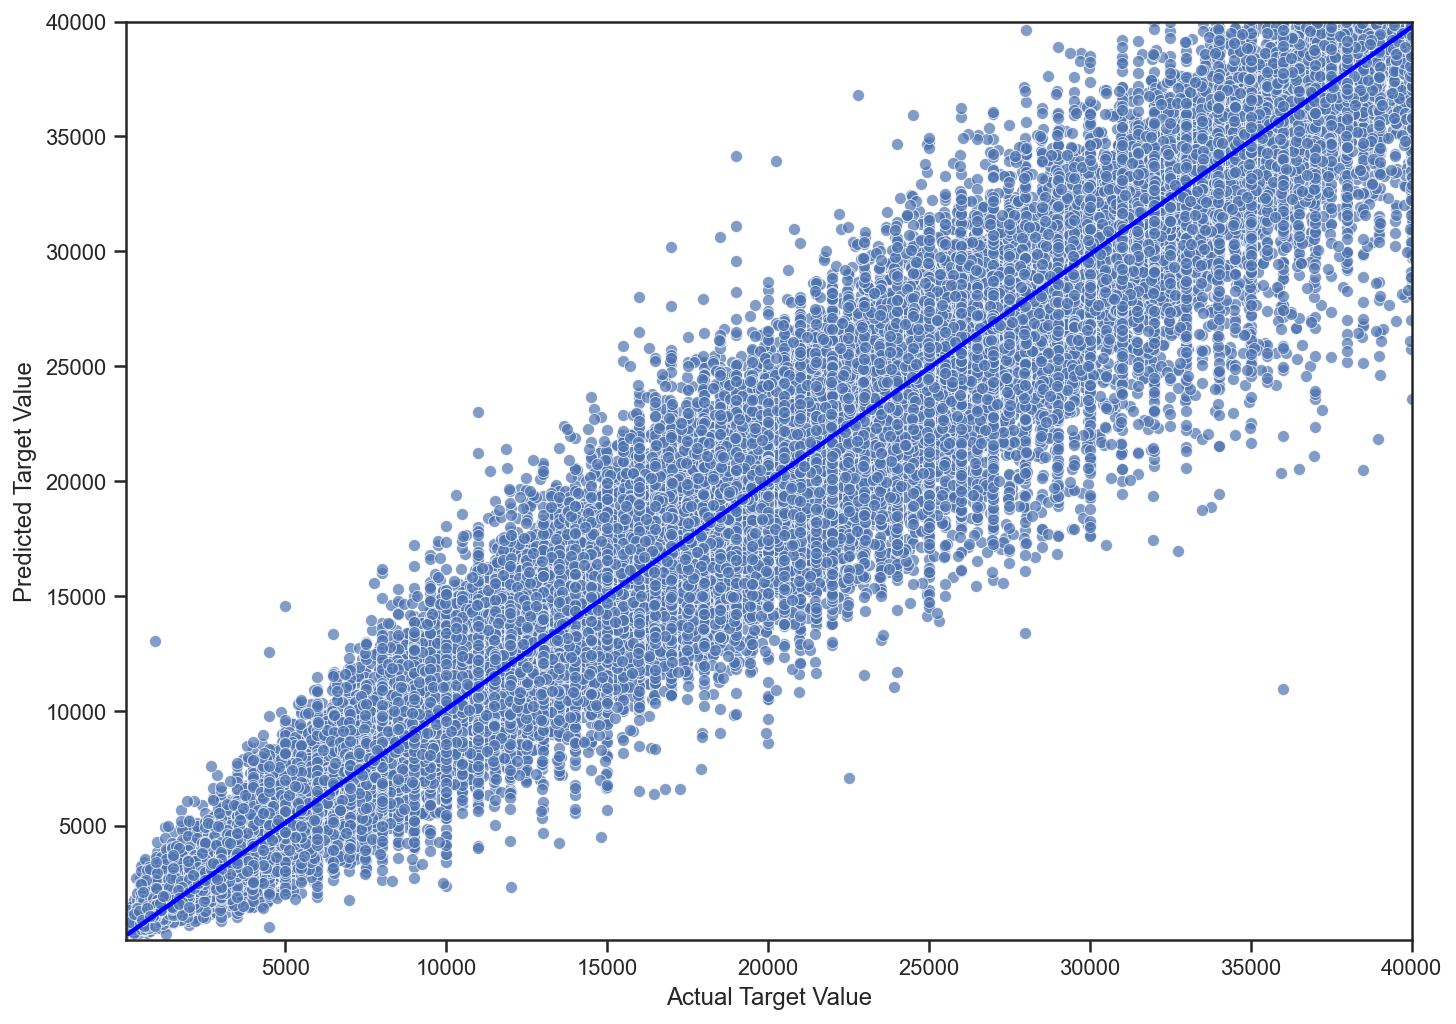

In [110]:
# Joining back the encoded train and test sets
X1 = pd.concat([X_train, X_test])
y1 = pd.concat([y_train, y_test])

#Fitting the model
xgb = xgb.fit(X1, y1)

y_pred = xgb.predict(X1)
y_actual = pd.DataFrame(y1)
y_pred = pd.DataFrame(y_pred, index=y_actual.index)
y_concat = pd.concat([y_actual, y_pred], axis=1)
y_concat.columns=['y_actual', 'y_pred']
Actual= y_concat['y_actual']
Predicted = y_concat['y_pred']

# Plotting the Actual Target Value VS Predicted Target Value
fig, ax = plt.subplots(figsize=(10,7), constrained_layout=True)
sns.scatterplot(x=Actual, y=Predicted, alpha=0.7, ax=ax)
sns.regplot(x=Actual, y=Predicted, color='blue', scatter=False)
ax.set_xlabel('Actual Target Value')
ax.set_ylabel('Predicted Target Value')
ax.set_xlim(38, 40000)
ax.set_ylim(38, 40000)
ax.plot((38, 102), (38, 102), alpha=0.3);


* The regression plot, which compares the actual and predicted values, shows that the model has a good performance. This is demonstrated by the line of best fit being close to the 45-degree line, which represents high accuracy prediction. The regression plot overall indicates that the model seem to be fitting the data well.

### Learning curve

In [124]:
import xgboost as xgb

#Model instantiation
xgb = xgb.XGBRegressor(learning_rate = 0.2, max_depth=13)

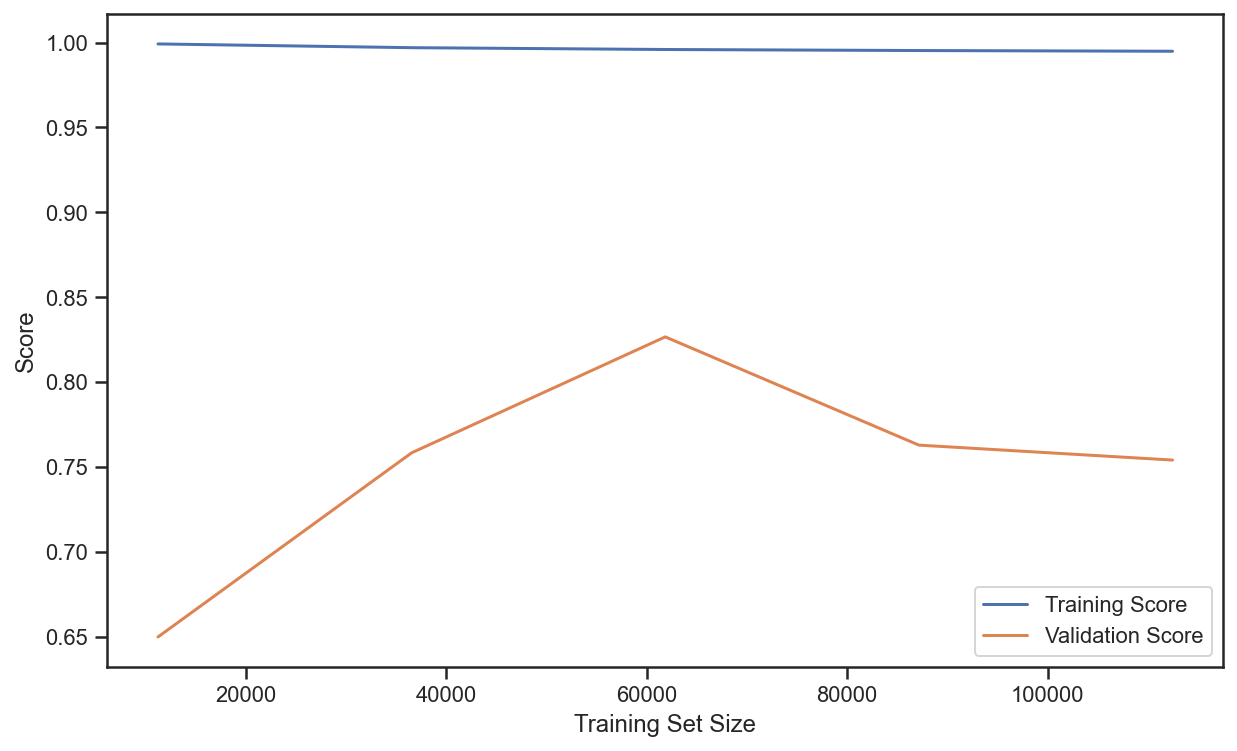

In [125]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generating the learning curves
train_sizes, train_scores, val_scores = learning_curve(xgb, X_train, y_train, cv=5)

# Ploting the learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
ax.set_xlim(38, 40000)
ax.set_ylim(38, 40000)
ax.plot((38, 102), (38, 102), alpha=0.3);
plt.show()

* From the learning curve, knowing that generally.. as the amount of training data increases, the training score will typically decrease, while the validation score will initially decrease and then level off or increase, there is an indication from the plot that the model is underfitting considering the the gap betwwen the training and validation lines. Additionally, looking at the slope of the training line, it may also means that the model is saturated. 
* However, it may be useful to check the feature importance and see if there are any changes or improvements that can be made to the model's performance.

## 4.2. Feature Importance

### Feature Importance: Leave One Out, Effect on Performance

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [154]:
import xgboost as xgb

#Model instantiation
xgb = xgb.XGBRegressor(learning_rate = 0.2, max_depth=13)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

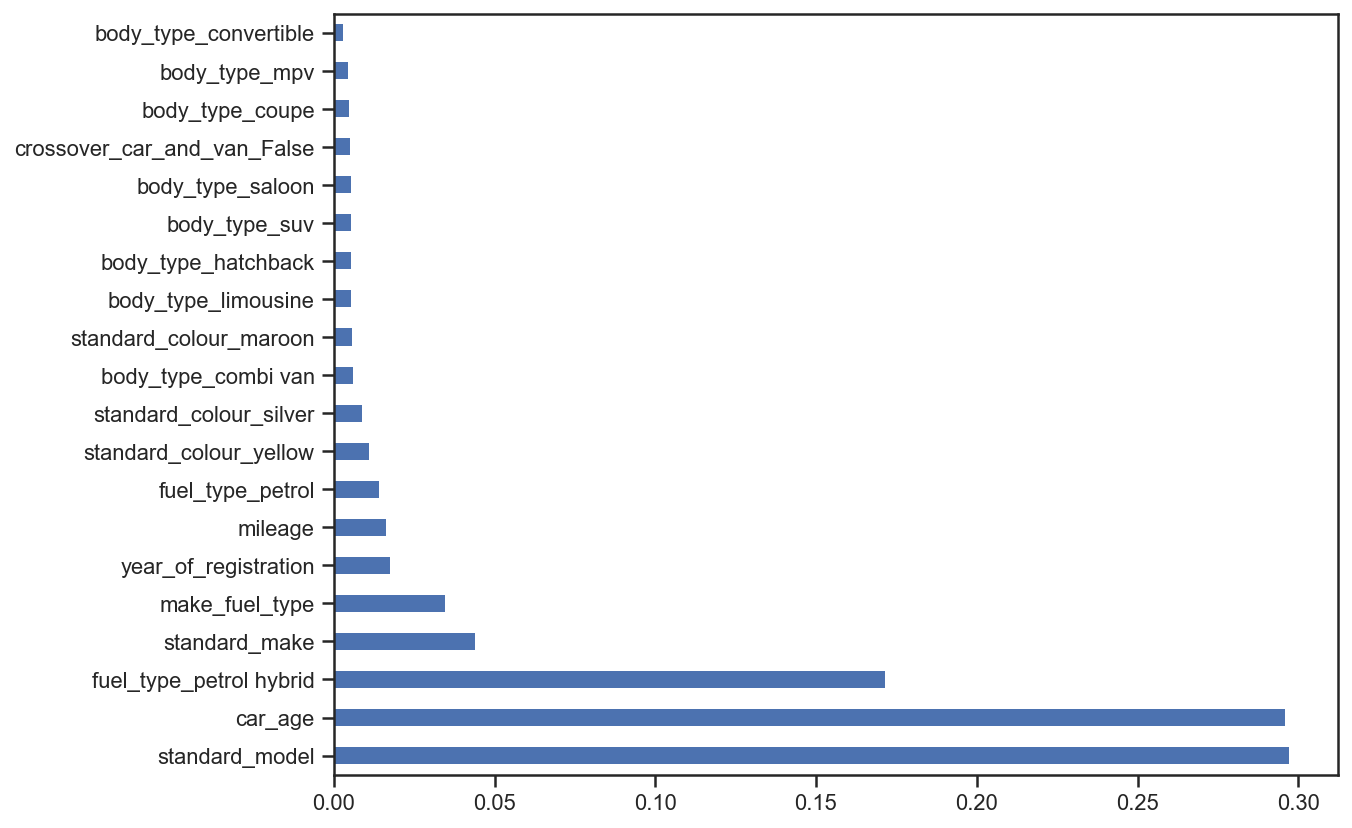

In [155]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (9,7))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [156]:
score_before = mean_absolute_error(y_test, xgb.predict(X_test))
score_before

2088.3070894114535

In [157]:
features_of_interest = ['standard_model','fuel_type_petrol', 'mileage', 'body_type_hatchback', 'car_age']

In [158]:
feat_scores = { }
for feat in features_of_interest:
    X_rf1 = X1.drop(columns=[feat])
    y_rf1 = y1
    X_rf1_train, X_rf1_test, y_rf1_train, y_rf1_test = train_test_split(X_rf1, y_rf1, random_state=2)

    #fitting the model(no need for instantiating again)
    xgb.fit(X_rf1_train, y_rf1_train)
    feat_scores[feat] = mean_absolute_error(y_rf1_train, xgb.predict(X_rf1_train))
    loss_after = np.abs(pd.Series(feat_scores)-score_before).sort_values(ascending=False)

In [159]:
pd.Series(feat_scores)

standard_model         2388.184056
fuel_type_petrol       1326.927304
mileage                1738.446655
body_type_hatchback    1289.613390
car_age                1321.354327
dtype: float64

In [160]:
loss_after

body_type_hatchback    798.693699
car_age                766.952763
fuel_type_petrol       761.379786
mileage                349.860435
standard_model         299.876966
dtype: float64

* To assess the impact of leaving out specific features on the model's performance, a technique called Leave one out cross-validation was used, where one feature was removed at a time and the performance of the model was evaluated using the mean absolute error as the loss function. The results showed that removing certain features significantly increased the loss, indicating that these features are crucial for improving the model's accuracy. Therefore, it can be inferred that these features play a vital role in the model's performance.

### Feature importance: Permutation Importance

In [163]:
import eli5
from eli5.sklearn import PermutationImportance

In [165]:
import xgboost as xgb

#Model instantiation
xgb = xgb.XGBRegressor(learning_rate = 0.2, max_depth=13)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [166]:
perm_imp = PermutationImportance(xgb).fit(X_train, y_train)

In [167]:
eli5.show_weights(perm_imp, feature_names=X_train.columns.tolist())

Weight,Feature
1.2062 ± 0.2023,standard_model
0.4905 ± 0.1204,mileage
0.1553 ± 0.0270,car_age
0.1166 ± 0.0052,standard_make
0.0876 ± 0.0033,year_of_registration
0.0684 ± 0.0221,fuel_type_petrol hybrid
0.0396 ± 0.0005,make_fuel_type
0.0033 ± 0.0001,standard_colour_black
0.0028 ± 0.0003,fuel_type_petrol
0.0028 ± 0.0002,body_type_hatchback


* The permutation importance analysis shows that the importance of different features varies, with some features having a greater impact on the model's performance than others.
* In this list, it can be seen that features like "standard_model", "mileage", "car_age", "standard_make" are more important than features like "fuel_type_petrol hybrid", "make_fuel_type" in determining the performance of the model, which means that when these features are removed or permuted, the model's performance decreases the most

## 4.3. Fine-Grained Evaluation (Instance level errors)

### SHAP                               

In [168]:
!pip install -q shap
import shap
shap.initjs()

In [169]:
explainer = shap.TreeExplainer(xgb)

In [170]:
shap_values = explainer.shap_values(X_test)

In [171]:
X_test.shape
row_idx = 77

In [172]:
# for some reason, Colab needs the Javascript to be initialised in each cell...
shap.initjs()
# a local explanation with force_plot
shap.force_plot(
    explainer.expected_value, 
    shap_values[row_idx], 
    X_test.iloc[row_idx])

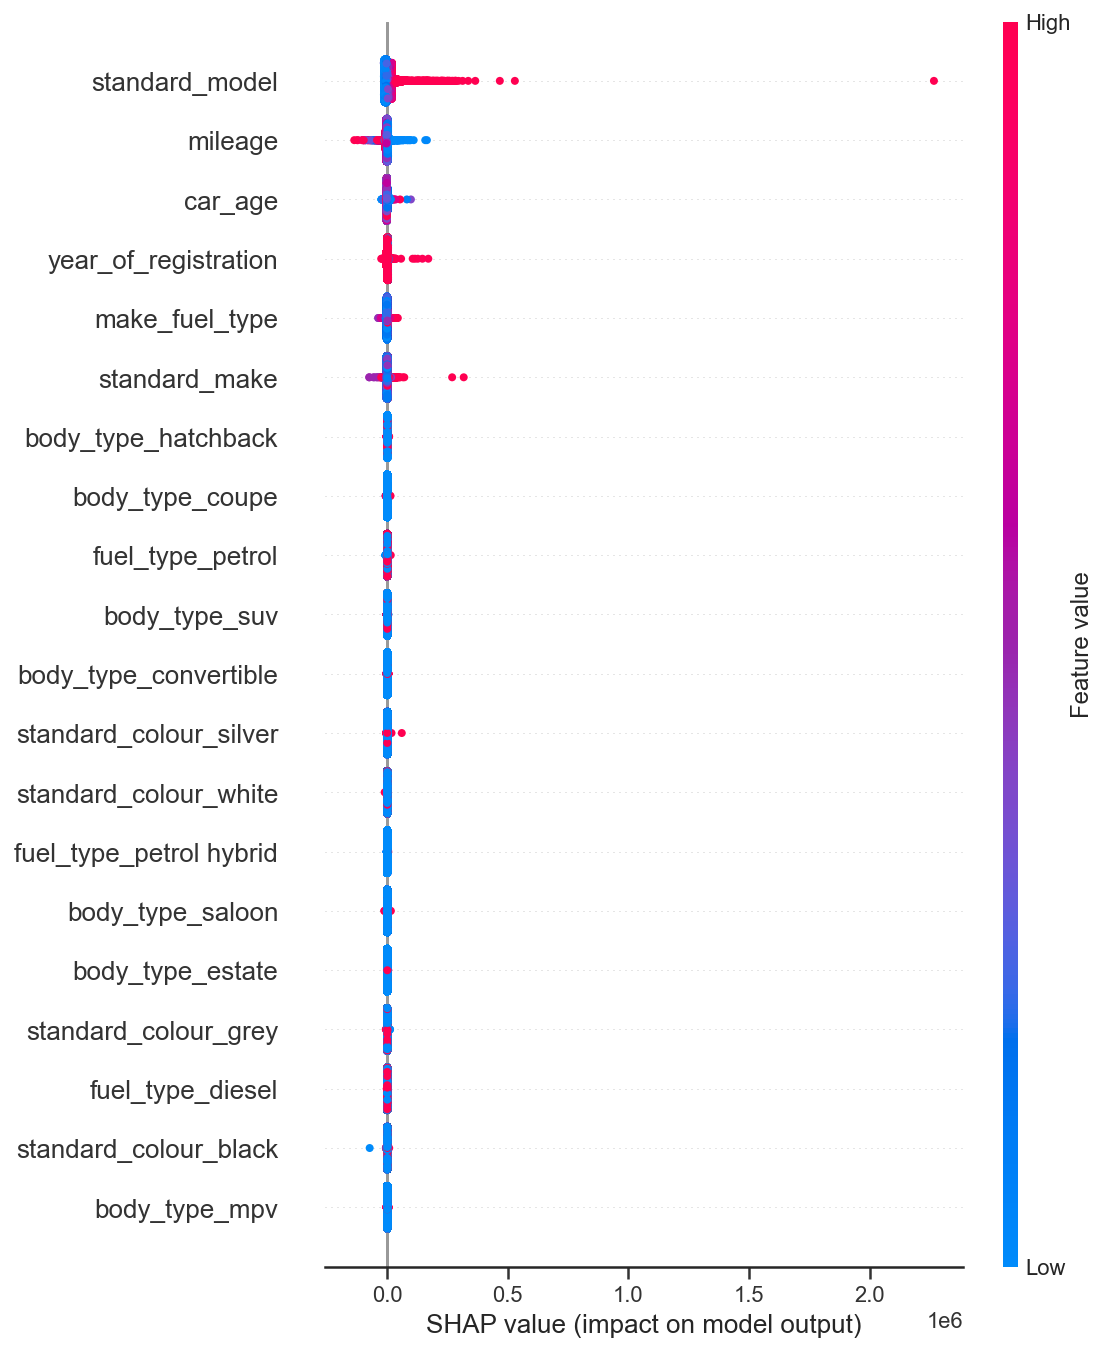

In [173]:
shap.summary_plot(shap_values, X_test)

* **Considering an instance on row 77 of the dataset;**
 * The shap value plot shows the 6 features that have the most impact on the target value. It shows that the features "body_type_hatchback", "year_of_registration", and "standard_model" have a high impact on the target, while the features "car_age", "make_fuel_type", and "mileage" have a low impact.
 * The impact of the features varies in the "higher" and "lower" regions of the plot, with the "standard_model" feature having the most impact in the "higher" region and the "car_age" feature having the most impact in the "lower" region. The base target value at this row is 17,130 and the model's prediction is 19,604.34.
  The overall impact of the "high" and "low" features on this instance results in the target (price) shifting from the base value of 17,130 to the predicted 19,604.34.
 * The prediction error at this instance is (19,604.34 - 17,130) which is approximately 2,474. This is similar to the mean absolute error of approximately 2104, indicating that the model's prediction at this instance is approximately correct. 

### Residuals

In [174]:
y_true = y_test
y_pred = rfr.predict(X_test)

In [175]:
np.mean(np.abs(y_pred - y_true))

2163.5995314073853

In [176]:
# let us look at the whole data for ML (i.e., our X, y)
residual = rfr.predict(X_train) - y_train
residual = pd.Series(residual).rename('residual')
residual.head()

367325     633.540000
394618     -66.740000
1077      -112.910000
225103     678.640000
126027    4308.103799
Name: residual, dtype: float64

In [177]:
residual_abs = residual.abs().rename('residual_abs')
X_res = pd.concat([ X_train, residual, residual_abs ], axis='columns')
X_res.sort_values('residual_abs', ascending=False).head(2)

,mileage,standard_make,standard_model,year_of_registration,car_age,make_fuel_type,standard_colour_beige,standard_colour_black,standard_colour_blue,standard_colour_bronze,...,fuel_type_diesel,fuel_type_diesel hybrid,fuel_type_diesel plug-in hybrid,fuel_type_electric,fuel_type_natural gas,fuel_type_petrol,fuel_type_petrol hybrid,fuel_type_petrol plug-in hybrid,residual,residual_abs
197883,-1.076288,12.206964,32.618338,0.293751,3,11.476909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-879862.25,879862.25
51695,-0.958554,16.832427,18.293439,0.288188,6,16.575849,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-725100.25,725100.25


In [178]:
auto_res = pd.concat([ auto, residual, residual_abs ], axis='columns')
auto_res.sort_values('residual_abs', ascending=False).head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,make_fuel_type,residual,residual_abs
197883,202008252907180,300.0,17,black,ferrari,laferrari,used,2017,3799995,hatchback,False,petrol,3,ferrari_petrol,-879862.25,879862.25
51695,202002257718775,4400.0,14,black,bugatti,veyron,used,2014,2850000,coupe,False,petrol,6,bugatti_petrol,-725100.25,725100.25


* The residuals suggests that although the selected model(XGBoost) has a high accuracy and mean absolute error, it seems not to be doing well with very expensive cars.

# Conclusion

* In conclusion, the XGBoost model has the ability to accurately predict the prices of cars based on a variety of features such as standard model, mileage, year of registration etc,. The model was trained on a dataset of historical car sales data and achieved an R-squared value of approximately 0.78, indicating a strong correlation between the predicted and actual prices. The model was further evaluated using cross-validation and showed consistent performance across different subsets of the data. This model can be useful for both car buyers and sellers as it can provide an estimate of the market value of a new and used car. Furthermore, this model can be fine-tuned to improve it's prediction on very expensive cars and overrall predictive capabilities over time.